<a href="https://colab.research.google.com/github/MariaMitrankova/Community-Detection-in-Procurement/blob/main/Cartel_and_Corruption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,8,22,25,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import pandas as pd
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/ohio_milk_data.csv")

In [ ]:
auctions.shape

(7004, 11)

In [2]:
auctions['start_date'] = pd.to_datetime(auctions['start_date'])

In [3]:
auctions['date'] = pd.to_datetime(auctions['date'])
auctions['end_date'] = pd.to_datetime(auctions['end_date'])

In [ ]:
auctions.head()

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,won,con.win,sel_num,sel.period,au.reserve,au.duration,auciton_id,com_n,sus,com
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.3,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,True,0.999999,1,1,0.326927,3,603231,0,False,False
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,193,1966,0.191380,3,373738,0,False,False
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,True,0.034483,47,2599,0.191380,3,373738,0,False,False
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,42,2497,0.191380,3,373738,0,False,False
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,258,2123,0.191380,3,373738,0,False,False


In [ ]:
auctions[auctions['com_n'] != -1].groupby(['participant_inn'])['start_date'].diff().median()

Timedelta('8 days 01:00:00')

In [4]:
auctions['year'] = auctions['start_date'].dt.year

In [ ]:
auctions.groupby('com_n')['year'].nunique().mean()

1.825618000722506

In [ ]:
auctions.head()

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,won,con.win,sel_num,sel.period,au.reserve,au.duration,auciton_id,com_n,sus,com
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.3,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,True,0.999999,1,1,0.326927,3,603231,0,False,False
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,193,1966,0.191380,3,373738,0,False,False
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,True,0.034483,47,2599,0.191380,3,373738,0,False,False
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,42,2497,0.191380,3,373738,0,False,False
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,258,2123,0.191380,3,373738,0,False,False


In [5]:
import matplotlib.pyplot as plt


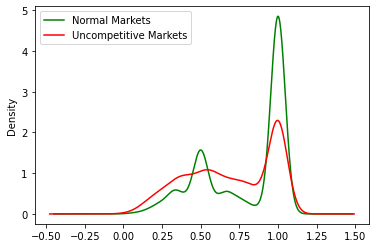

In [ ]:
fig, ax = plt.subplots(1,1)
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

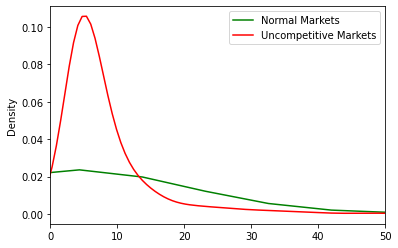

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,50])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

In [ ]:
auctions[auctions['sus'] & (auctions['com_n'] != -1)]['com_n'].nunique()

2005

In [ ]:
coherence[151]

0.42462456160222806

In [ ]:
auctions[auctions['sus'] & (au)]['participant_inn'].nunique()

4978

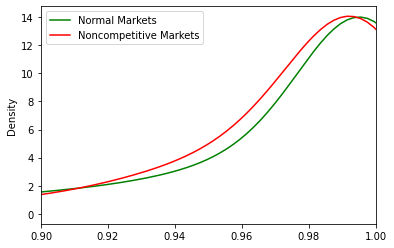

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Noncompetitive Markets')
plt.legend()

In [ ]:
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean())

0.9552790587730157 0.10583125397575209 0.9935767916120197
0.9628193854221175 0.08436137089754439 0.9628193854221175


MannwhitneyuResult(statistic=5671055.0, pvalue=1.3796884735631112e-06)

In [ ]:
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean())

2 days 01:30:27.521379907 2 days 00:50:50.643169315 1 days 12:23:29.217362491
2 days 07:44:05.409363449 1 days 12:09:32.087915196 2 days 02:53:58.647058823


MannwhitneyuResult(statistic=4998114.5, pvalue=7.845880699092166e-34)

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean())

0.7873634791483152 0.26634359284875875 0.999999000001
0.6912274161607703 0.2788067198308037 0.6999998833333527


MannwhitneyuResult(statistic=5688845.5, pvalue=4.18588329296211e-06)

In [ ]:
auctions['sev_times'] = auctions.groupby('com_n')['auction_id'].transform('nunique') > 1

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean())

7.29827377061092 93.21953951011878 3.0
8.345282442520144 11.00584104296092 6.0


MannwhitneyuResult(statistic=2408409.0, pvalue=0.0)

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean())

7.717404846203268 2.500171148036499 7.0
7.85346011950237 1.7223894874265315 7.666666666666667


MannwhitneyuResult(statistic=5379263.0, pvalue=1.4517470447924991e-15)

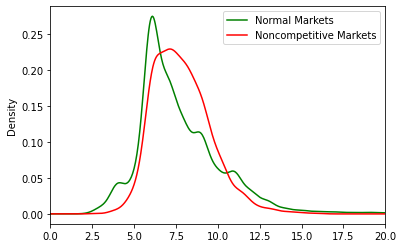

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,20])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().plot.density(color='red', ax=ax, label='Noncompetitive Markets')
ax.legend()

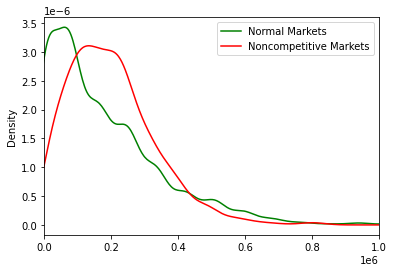

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1e6])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().astype(int).plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().astype(int).plot.density(color='red', ax=ax, label='Noncompetitive Markets')
plt.legend()

In [ ]:
auctions[auctions['com_n'] == -1]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,sel_num,sel.period,au.reserve,au.duration,auciton_id,com_n,sus,com,one_com,cv_price
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.30,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,1,1,0.326927,3,603231,-1,False,False,True,6.269499
17,1202976,3.623000e+17,Sverdlovskaja_obl,3.623000e+09,95320.49,NaN,2014-03-12 16:00:00,2014-03-18 14:00:00,NaN,6,...,1,1,0.190641,5,555265,-1,False,False,True,6.269499
20,1177229,1.583000e+17,Rostovskaja_obl,1.583000e+09,450600.00,NaN,2014-04-03 10:00:00,2014-04-15 10:00:00,NaN,5,...,1,1,0.901200,12,542696,-1,False,False,True,6.269499
28,708980,3.391000e+17,Kemerovskaja_obl,3.391000e+09,229885.20,NaN,2014-04-17 08:00:00,2014-04-24 16:30:00,2014-05-05 16:30:00,8,...,2,64,0.459770,7,319422,-1,False,False,True,6.269499
44,1116876,3.131000e+17,Tambovskaja_obl,3.131000e+09,171438.00,NaN,2014-05-05 09:00:00,2014-05-08 23:59:00,2014-05-16 23:59:00,5,...,1,1,0.342876,3,513025,-1,False,False,True,6.269499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375455,4169415,3.242000e+17,Arkhangelskaja_obl,3.242000e+09,1696296.00,RUB,2021-12-30 16:23:10,2022-01-18 16:00:00,NaN,5,...,8,1680,3.392592,18,5963962,-1,False,False,True,6.269499
3375504,3299650,1.723000e+17,Sankt-Peterburg,1.723000e+09,2998816.31,RUB,2021-12-30 17:38:11,2022-01-14 01:00:00,NaN,3,...,1,1,5.997633,14,6060505,-1,False,False,True,6.269499
3375565,3224009,3.653000e+17,Tomskaja_obl,3.653000e+09,121505.00,RUB,2021-12-30 18:25:36,2022-01-14 00:00:00,NaN,3,...,3,1860,0.243010,14,6002665,-1,False,False,True,6.269499
3375580,4285086,1.731000e+17,Moskva,1.731000e+09,956334.60,RUB,2021-12-30 19:13:44,2022-01-14 12:00:00,NaN,6,...,1,1,1.912669,14,6075988,-1,False,False,True,6.269499


In [ ]:
auctions['bid_date'] = auctions['end_date'] - auctions['date']

In [6]:
auctions['bid_date'] = pd.to_timedelta(auctions['bid_date'])

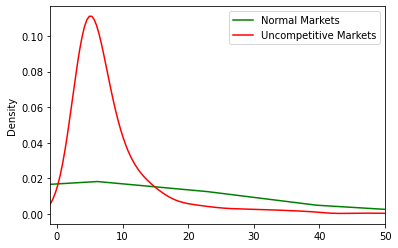

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([-1,50])
auctions[(~auctions['sus']) & (auctions['single'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].median().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].median().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

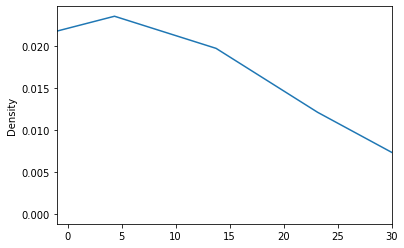

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([-1,30])

auctions[(~auctions['sus']) & (auctions['single'])].groupby(['com_n'])['sel_num'].mean().plot.density(ax=ax)

In [ ]:
d = auctions[(auctions['sus']) & (auctions['single'])]['region'].value_counts()

In [ ]:
auctions[(~auctions['sus']) & (auctions['single'])][['code_1', 'code_2']].value_counts()

code_1  code_2
32.0    50.0      4795
86.0    90.0      3887
21.0    20.0      2599
33.0    12.0      2437
20.0    59.0      2436
                  ... 
71.0    10.0         1
18.0    23.0         1
38.0    32.0         1
36.0    61.0         1
28.0    71.0         1
Length: 758, dtype: int64

In [ ]:
d2 = auctions[(~auctions['sus']) & (auctions['single'])]['region'].value_counts()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 24.1 MB/s 
     |████████████████████████████████| 16.7 MB 54.5 MB/s 


/usr/local/lib/python3.7/dist-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 0
  for feature in features_lst:
/usr/local/lib/python3.7/dist-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 0
  for feature in features_lst:


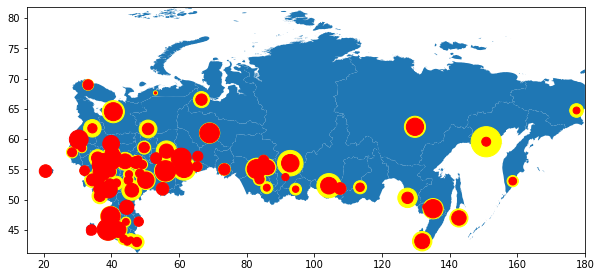

In [ ]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import json

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

data = load_data(
    'https://raw.githubusercontent.com/tttdddnet/Python-Jupyter-Geo/main/geo_ru.json',
    'geo_ru.json',
     json.load)    


regs = gpd.read_file('geo_ru.json')
c = gpd.read_file('coords.gpkg')
c.index = c['region']


regs = gpd.read_file('geo_ru.json')
c = gpd.read_file('coords.gpkg')
c.index = c['region']
c['reg_c'] = d
c['reg_2'] = d2
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([15,  regs.total_bounds[2]])
ylim = ([regs.total_bounds[1],  regs.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
base = regs.plot(ax=ax)
c.plot(markersize=c['reg_c'], color='yellow', ax=base)
c.plot(markersize=c['reg_2']/50, color='red', ax=base)

In [ ]:
c.head()

,,id,subject,center,lat,lon,lat_radians,long_radians,type,region,geometry,reg_c,reg_2
region,,,,,,,,,,,,,
Neneckij_AO,None,81,Ненецкий АО,Нарьян-Мар,67.63869,53.00371,1.1805178422357629,0.92508925527224362,АО,Neneckij_AO,POINT (53.00371 67.63869),17,17
Khanty-Mansijskij_AO-Jugra_AO,None,82,Ханты-Мансийский автономный округ — Югра,Ханты-Мансийск,61.00417,69.00194,1.0647236239463489,1.204311043263576,АО,Khanty-Mansijskij_AO-Jugra_AO,POINT (69.00194 61.00417),413,413
Chukotskij_AO,None,83,Чукотский АО,Анадырь,64.73424,177.51030,1.1298256267762139,3.0981391912028902,АО,Chukotskij_AO,POINT (177.51030 64.73424),186,186
Jamalo-Neneckij_AO,None,84,Ямало-Ненецкий АО,Салехард,66.53000,66.60194,1.1611675513518269,1.162423141215712,АО,Jamalo-Neneckij_AO,POINT (66.60194 66.53000),259,259
Evrejskaja_Aobl,None,80,Еврейская автономная область,Биробиджан,48.79284,132.92386,0.85159570939879004,2.3199590114599902,Аобл,Evrejskaja_Aobl,POINT (132.92386 48.79284),12,12


Text(0.5, 1.0, 'Noncompetitive Market Distribution')

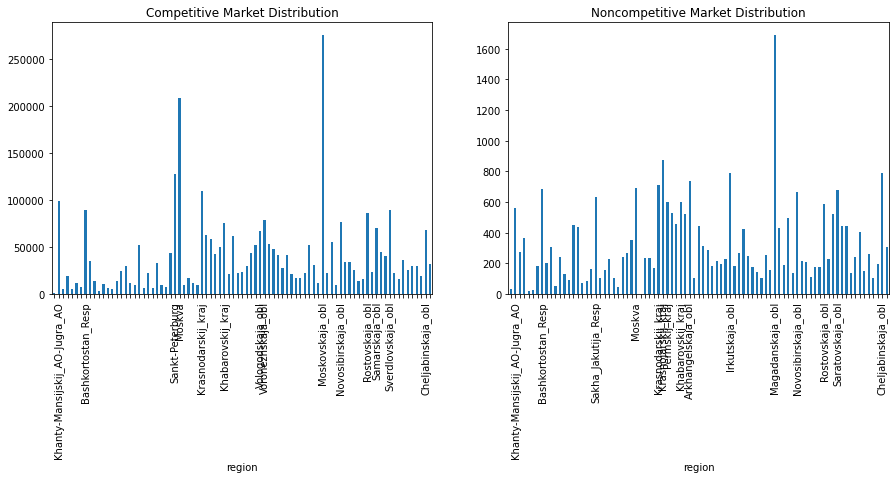

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))
shape_c = auctions[(~auctions['sus'])]['region'].shape[0]
c['reg_2'] = auctions[(~auctions['sus'])]['region'].value_counts()
c['reg_2'].plot(kind='bar', ax = ax1)
labels = [c['region'][i] if c['reg_2'][i] >=0.02*shape_c else "" for i in range(85)]    
ax1.set_xticklabels(labels)
ax1.set_title('Competitive Market Distribution')
shape_u = auctions[(auctions['sus'])]['region'].shape[0]
c['reg_c'] = auctions[(auctions['sus'])]['region'].value_counts()
c['reg_c'].plot(kind='bar', ax = ax2)
labels = [c['region'][i] if c['reg_c'][i] >= 0.02*shape_u else "" for i in range(85)]    
ax2.set_xticklabels(labels)
ax2.set_title('Noncompetitive Market Distribution')



In [ ]:
c['reg_c']

region
Neneckij_AO                        Magadanskaja_obl
Khanty-Mansijskij_AO-Jugra_AO    Krasnojarskij_kraj
Chukotskij_AO                        Irkutskaja_obl
Jamalo-Neneckij_AO               Cheljabinskaja_obl
Evrejskaja_Aobl                  Arkhangelskaja_obl
                                        ...        
Tulskaja_obl                       Ingushetija_Resp
Tjumenskaja_obl                        Adygeja_Resp
Uljanovskaja_obl                        Neneckij_AO
Cheljabinskaja_obl                  Evrejskaja_Aobl
Jaroslavskaja_obl                      Sevastopol_g
Name: reg_c, Length: 85, dtype: object

In [118]:
auctions['code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str)

In [ ]:
auctions.groupby(['com_n'])['code'].nunique().mean()

2.014760528488852

In [7]:
import networkx as nx
!pip install cdlib
from cdlib import algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 28.3 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 14.2 MB 37.3 MB/s 
     |████████████████████████████████| 2.6 MB 45.1 MB/s 
     |████████████████████████████████| 3.1 MB 44.9 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=ffdb4c75b476581982845eb2ddaffff8ccffc262304f791ad35463e9d5f8b6d9
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149859 sha256=f97a7b7c5af6979506bdb80d53793c85fcbdbc67b628b29cacafe4a108caeddf
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built pyclustering python-Leven

In [8]:
gr = auctions[['participant_inn', 'auction_id']]
gr_ns = gr[gr.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_ns


,participant_inn,auction_id
1,-5261068940,373737
2,-524300861251,373737
3,-5261022216,373737
4,-5260292548,373737
5,-7705201083,373737
...,...,...
3375718,-390401513615,5972583
3375719,-1215228078,5972583
3375720,-290121939800,5972583
3375725,-7706196090,6076020


In [ ]:
gr = auctions[['firm', 'contract_id']]
gr_ns = gr[gr.groupby('contract_id')['contract_id'].transform('size') > 1]
gr_ns.shape

(5391, 2)

In [9]:
G_nw = nx.Graph()
G_nw.add_nodes_from(gr_ns['participant_inn'], bipartite=0)
dct  = gr_ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_nw.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_nw[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_nw.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_nw) 

406372

In [ ]:
G_nw = nx.Graph()
G_nw.add_nodes_from(gr_ns['firm'], bipartite=0)
dct  = gr_ns.groupby('contract_id')['firm'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_nw.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_nw[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_nw.add_edge(dct[a][i], dct[a][j], weight=1)

len(G_nw) 

110

In [ ]:
for e in G_nw.edges:
  G_nw[e[0]][e[1]]['weight'] /= (G_nw.degree(e[0], weight='weight') + G_nw.degree(e[1], weight='weight'))

In [ ]:
!pip install leidenalg

     |████████████████████████████████| 1.3 MB 5.2 MB/s 


In [ ]:
import cdlib

In [ ]:
coms_55 = algorithms.leiden(G_nw)
print(len(coms_55.communities))
print(len(coms_55.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_nw, coms_55))
print(cdlib.evaluation.conductance(G_nw, coms_55))

19469
32313
FitnessResult(min=None, max=None, score=0.8575992147849859, std=None)
FitnessResult(min=0.0, max=0.29400556184983007, score=0.002058297217420602, std=0.014673408901616667)


In [ ]:
coms_55 = algorithms.louvain(G_nw)
print(len(coms_55.communities))
print(len(coms_55.communities[0]))
# print(cdlib.evaluation.newman_girvan_modularity(G_nw, coms_55))
# print(cdlib.evaluation.conductance(G_nw, coms_55))

7
25


In [ ]:
import numpy as np
from tqdm import tqdm 

coherence = []
for c in tqdm(coms_55.communities):
  com = G_nw.subgraph(c).copy()
  w = []
  for e in com.edges():
    w.append(com.get_edge_data(*e)['weight'])
  w = np.array(w)
  ch = np.prod(w) ** (1/len(w)) / np.mean(w)
  coherence.append(ch)


100%|██████████| 10/10 [00:00<00:00, 1576.21it/s]


In [ ]:
coherence

In [ ]:
import cdlib
print(cdlib.evaluation.conductance(G_nw, coms_55, summary=False))

[0.28695936063518596, 0.15520631709733895, 0.2446517382160089, 0.1907131946892257, 0.14900888585099112, 0.22361545218688075, 0.3023908025240577, 0.14670364933350055, 0.06288355178422608, 0.26973597272511035, 0.22073401186884595, 0.41380188947896945, 0.14201647704982345, 0.14477461634426056, 0.18923926598966684, 0.1930289827618867, 0.3187756895506449, 0.2116204629233738, 0.13342262799661045, 0.1455114111417335, 0.1416599260074523, 0.22570001940822557, 0.17878402442126684, 0.05633841901664456, 0.1848767199347596, 0.275964219330855, 0.1313117593127101, 0.2077217161466937, 0.17014058893474154, 0.1723543335475679, 0.15547120619584387, 0.10248886560125753, 0.18518899989700277, 0.17378881465607798, 0.07420152183395531, 0.15375339161893278, 0.19187031212194533, 0.05553524543853235, 0.2106762037221008, 0.14947179141380085, 0.1548346654129447, 0.3373484069886948, 0.1769158606411542, 0.1848672997321646, 0.24574762946754194, 0.22172099753170482, 0.2293952099247602, 0.14836851479895402, 0.252326716

In [ ]:
nx.conductance(G_nw, coms_55.communities[0], weight='weight')

0.28695936063518596

In [ ]:
G_ns = nx.Graph()
G_ns.add_nodes_from(gr_ns['auction_id'], bipartite=0)
G_ns.add_nodes_from(gr_ns['participant_inn'], bipartite=1)
G_ns.add_edges_from([(row['auction_id'], row['participant_inn']) for idx, row in gr_ns.iterrows()])

In [ ]:
coms_5 = algorithms.louvain(G_ns)
print(len(coms_5.communities))
print(len(coms_5.communities[0]))
print(cdlib.evaluation.newman_girvan_modularity(G_ns, coms_5))
print(cdlib.evaluation.conductance(G_ns, coms_5))

19359
92289
FitnessResult(min=None, max=None, score=0.8787939484495136, std=None)
FitnessResult(min=0.0, max=0.18009641657964998, score=0.001036128488261275, std=0.008550843294518176)


In [161]:
auctions['one_com'] = auctions.groupby('auction_id')['com_n'].transform('nunique') == 1
auctions['cv_price'] = auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['bid_price'].transform('std')


In [162]:
auctions['cv_price'] = auctions['cv_price'] / auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['bid_price'].transform('mean')
auctions['cv_price'] = auctions['cv_price'].fillna(0)

In [13]:
auctions['cv_bidding'] = auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['price'].transform('std')
auctions['cv_bidding'] = auctions['cv_bidding'] / (auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['price'].transform('mean') + 1e-6)
auctions['cv_bidding'] = auctions.groupby('com_n')['cv_bidding'].transform('mean')
auctions['cv_bidding'] = auctions['cv_bidding'].fillna(0)

In [ ]:
auctions['bid_date'] = 

dtype('O')

In [14]:
auctions['bid_date']= (auctions['bid_date']).dt.total_seconds()

auctions['cv_date'] = auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['bid_date'].transform('std')
auctions['cv_date'] = auctions['cv_date'] / (auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['bid_date'].transform('mean') + 1e-6)
auctions['cv_date'] = auctions.groupby('com_n')['cv_date'].transform('mean')
auctions['cv_date'] = auctions['cv_date'].fillna(0)

In [ ]:
auctions['cv_date']

1          0.896834
2          0.896834
3          0.896834
4          0.896834
5          0.896834
             ...   
3375723    0.738008
3375724    0.738008
3375725    0.471408
3375726    0.471408
3375727    0.793615
Name: cv_date, Length: 3243241, dtype: float64

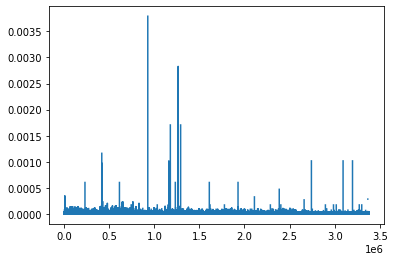

In [10]:
auctions.loc[(~auctions['participant_inn'].isin(gr_ns['participant_inn'])), ['com_n']] = -1

In [15]:
auctions = auctions[auctions['com_n'] != -1]

In [ ]:
auctions[~auctions['participant_inn'].isin(gr_ns['participant_inn'])]['cv_price']

0          6.269499
17         6.269499
20         6.269499
28         6.269499
44         6.269499
             ...   
3375455    6.269499
3375504    6.269499
3375565    6.269499
3375580    6.269499
3375685    6.269499
Name: cv_price, Length: 132487, dtype: float64

In [ ]:
def describe_comm(df, com, plot=False):

  df['com'] = df['participant_inn'].isin(com)
  comsx = df[df.groupby(['auction_id'])['com'].transform('sum') > 1]
  d = comsx['region'].value_counts()
  freq_r = comsx['region'].value_counts().idxmax()
  regs = d[d > len(comsx) * 0.02].index.to_list()
  
  codes = (comsx['code'].map(str)).value_counts()
 # print(codes)
  codes = codes[(codes > (len(comsx) - codes.get('nannan', 0)) * 0.05) ]
  codes = codes[codes.index != 'nannan'].index.to_list()
#  print(codes)
  # if plot:
  #   c['com'] = d
  #   regions = gpd.read_file('geo_ru.json')
  #   fig, ax = plt.subplots(figsize = (10,6))
  #   xlim = ([15,  regions.total_bounds[2]])
  #   ylim = ([regions.total_bounds[1],  regions.total_bounds[3]])

  #   ax.set_xlim(xlim)
  #   ax.set_ylim(ylim)
  #   base = regions.plot(ax=ax)
  #   c.plot(markersize=c['com']/50, color='yellow', ax=base)

  #   fig, ax1 = plt.subplots(1,1)
  #   cn['com'].plot(kind='bar', ax = ax1)
  #   labels = [cn['region'][i] if cn['com'][i] > 0.2 else "" for i in range(85)]    
  #   ax1.set_xticklabels(labels)
  #   ax1.set_title('Actual distribution of community')
  return regs, codes

In [ ]:
auctions['code_1'] = auctions['code_1'].fillna(auctions['code_1_y'])
auctions['code_2'] = auctions['code_2'].fillna(auctions['code_2_y'])
auctions['code_3'] = auctions['code_3'].fillna(auctions['code_3_y'])
auctions['code_4'] = auctions['code_4'].fillna(auctions['code_4_y'])
auctions['name'] = auctions['name'].fillna(auctions['name_y'])

In [ ]:
from tqdm import tqdm

descriptions = []
for i in tqdm(range(len(coms_5.communities))):
  descriptions.append(describe_comm(auctions, coms_5.communities[i]))
len(descriptions)

100%|██████████| 19359/19359 [3:49:54<00:00,  1.40it/s]


19359

In [ ]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile2.txt", "w")
f.write(str(descriptions))
f.close()

In [ ]:
import numpy as np

descriptions = np.array(descriptions)
mylen = np.vectorize(len)
mylen(descriptions[:, 1][mylen(descriptions[:,1])!=0]).mean()

1.3058954393770856

In [ ]:
mylen(descriptions[:, 1]).max()

8

In [ ]:
auctions['code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str)

In [ ]:
auctions['year'].max()

1990

In [16]:
auctions['year'] = auctions['start_date'].dt.year
auctions['month'] = auctions['start_date'].dt.month

def stability(com_n):
  comsx = auctions[(auctions['com_n'] == com_n) & auctions['one_com']]
  start_y = comsx['year'].min()
  end_y = comsx['year'].max()
  firms_l = []
  for k in range(start_y, end_y):
    for j in range(1, 13):
      firms = comsx[(comsx['year'] == k) & (comsx['month'] == j)]['participant_inn'].unique().tolist()
      if len(firms) > 0:
        firms_l.append(set(firms))

  ns_w = []
  if len(firms_l) <= 1:
    return [1]
  
  #print(len(firms_l))
  for i in range(len(firms_l)-1):
    ws1 = []
    com1 = G_nw.subgraph(firms_l[i] | firms_l[i+1]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i] and e[1] in firms_l[i]:
        ws1.append(com1.get_edge_data(*e)['weight'])
      else:
        ws1.append(0)
    ws1 = np.array(ws1, dtype=np.float64)
  #  print(ws1)
    ws2 = []
    # com2 = G_n.subgraph(communs[k+1][found[c]]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i+1] and e[1] in firms_l[i+1]:
        ws2.append(com1.get_edge_data(*e)['weight'])
      else:
        ws2.append(0)
    ws2 = np.array(ws2, dtype=np.float64)
    ws1_dm = ws1 - np.mean(ws1)
    ws2_dm = ws2 - np.mean(ws2)
    # print(ws1_dm.sum(), ws2_dm.sum())
    wes = (ws1_dm * ws2_dm).sum() / ((((ws1_dm ** 2).sum() * (ws2_dm ** 2).sum()) ** 0.5) + 1e-6)
    ns_w.append(wes)
  
  # nes_w_y.append(ns_w)
  return ns_w

In [ ]:
for c in coms_55.communities:
  print(len(c))

25
21
19
18
11
11
5


In [ ]:
np.array(stability(firms)).mean()

2       1981
3       1981
4       1982
5       1982
8       1984
        ... 
6970    1989
6971    1989
6972    1990
6998    1986
6999    1986
Name: year, Length: 1245, dtype: int64


0.58920951521699

In [17]:
from tqdm import tqdm
import numpy as np 

stabls1 = []
for i in tqdm(range(19376)):
  stabls1.append(stability(i))

100%|██████████| 19376/19376 [10:21<00:00, 31.19it/s]


In [ ]:
from tqdm import tqdm
import numpy as np 

stabls2 = []
for i in tqdm(range(19376)):
  stabls2.append(stability(i))

In [ ]:
stabls = np.array(stabls)
mylen = np.vectorize(len)
mysum = np.vectorize(sum)
stable = mysum(stabls)/mylen(stabls)
mean_st = (mysum(stabls)/mylen(stabls)).mean()

In [18]:
stabls = np.array(stabls1)
mylen = np.vectorize(len)
mysum = np.vectorize(sum)
#print(stabls)
stable = mysum(stabls)
mean_st = (mysum(stabls)/mylen(stabls)).mean()

In [ ]:
mean_st

0.664235462661207

In [19]:
# stabls = np.array(stabls2)
mylen = np.vectorize(len)
mysum = np.vectorize(sum)
stable = [sum(stabls[i])/len(stabls[i]) for i in range(len(stabls))]
mean_st = (mysum(stabls)/mylen(stabls)).mean()

In [ ]:
mean_st = np.percentile(stable[151:], 50)
mean_st

1.0

In [22]:
mean_st = stable[151:].mean()

In [21]:
stable = np.array(stable)
stable.argmax()

147

In [ ]:
mean_st

0.7272558357969221

In [ ]:
firms = auctions

In [ ]:
stabls[2].mean()

0.601202682936553

(array([  274.,    62.,   194.,   297.,  3720.,   193.,    91.,    69.,
           19., 14457.]),
 array([-9.99999923e-01, -7.99999931e-01, -5.99999938e-01, -3.99999946e-01,
        -1.99999954e-01,  3.84615354e-08,  2.00000031e-01,  4.00000023e-01,
         6.00000015e-01,  8.00000008e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

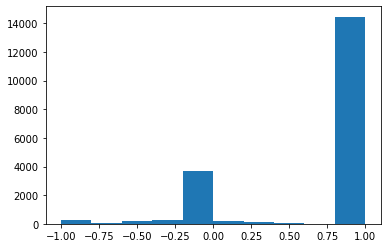

In [23]:
import matplotlib.pyplot as plt


plt.hist(stable)

In [ ]:
firms = auctions[auctions['is_cartel_firm']==1]['firm'].unique().tolist()

In [23]:
auctions['stable'] = (stable[auctions['com_n']] > mean_st) & (stabls[auctions['com_n']][0] != 1)
auctions[auctions['stable']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,com_n,sus,com,year,one_com,cv_price,cv_bidding,cv_date,month,stable
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,4826,False,False,2014,True,0.000000,0.010997,0.014866,4,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,4826,False,False,2014,True,0.000000,0.010997,0.014866,4,True
46,2495439,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,0.000000,0.078270,0.471408,5,True
48,2495438,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,0.000000,0.078270,0.471408,5,True
49,2495440,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,1.085352,0.078270,0.471408,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375510,3700457,3.463000e+17,Lipeckaja_obl,3.463000e+09,135020.64,RUB,2021-12-30 17:52:45,2022-01-14 09:00:00,NaN,3,...,24,False,False,2021,True,1.210562,0.259549,0.793615,12,True
3375578,3160696,3.303000e+17,Vologodskaja_obl,3.303000e+09,674780.80,RUB,2021-12-30 18:49:07,2022-01-14 00:00:00,NaN,3,...,24,False,False,2021,True,1.210562,0.259549,0.793615,12,True
3375725,3202809,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,84,False,False,2021,True,0.000000,0.078270,0.471408,12,True
3375726,3202808,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,84,False,False,2021,True,1.085352,0.078270,0.471408,12,True


In [ ]:
sum(stabls[2])/len(stabls[2])

0.8933417116325576

In [ ]:
auctions[auctions['com_n']==2]['firm'].nunique()

12

In [ ]:
auctions[(auctions['com_n'] >= 151)  &auctions['cartel']  & auctions['sev_times']]['participant_inn'].nunique()

7572

In [ ]:
auctions[(auctions['com_n'] >= 151) & (auctions['stable']) & auctions['cartel'] & auctions['coherent'] & auctions['exclusive'] & auctions['sev_times']].groupby('com_n')['participant_inn'].nunique().value_counts()

2    1615
3      96
4      11
Name: participant_inn, dtype: int64

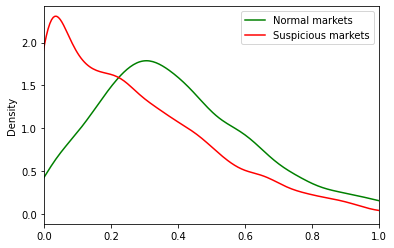

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~auctions['stable'])  & (auctions['com_n'] >= 151) & auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

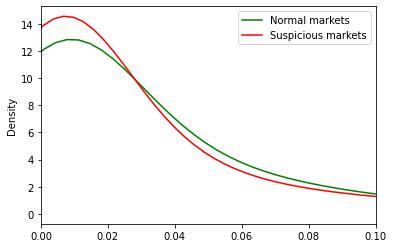

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

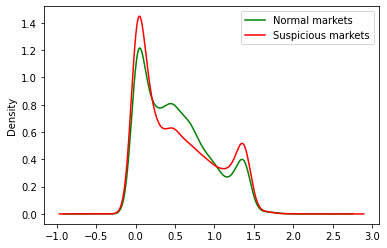

In [ ]:
fig, ax = plt.subplots(1,1)
# ax.set_xlim([0,1e4])
auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

KeyError: ignored

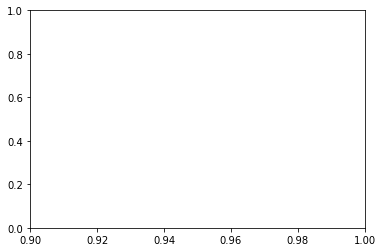

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

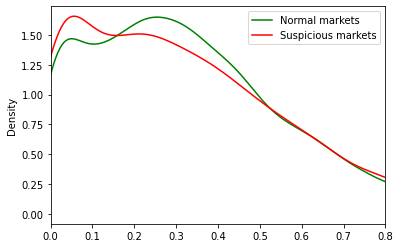

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.8])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
auctions[ auctions['cartel'] & auctions['sev_times'] & (auctions['com_n']>=151) &(~auctions['exclusive'])]['com_n'].nunique()

3

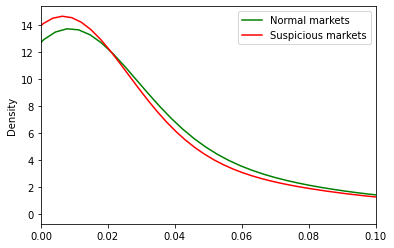

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

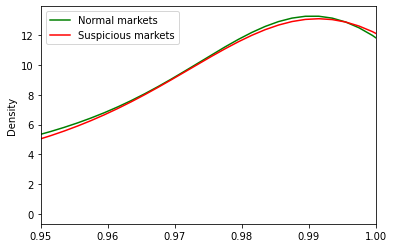

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.95,1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151) & auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

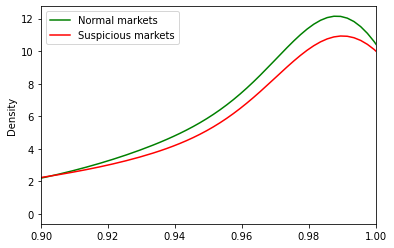

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['stable'])  & (auctions['com_n']  >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n']  >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

In [ ]:
similar = {21: [(4746, (['Permskij_kraj'], ['43.099.0'])), (18911, (['Permskij_kraj'], ['43.099.0'])), (19241, (['Permskij_kraj'], ['43.099.0'])), (19247, (['Permskij_kraj'], ['43.099.0']))], 39: [(18686, (['Omskaja_obl'], ['43.032.0']))], 91: [(208, (['Moskva'], ['71.012.0'])), (1828, (['Moskva'], ['71.012.0'])), (4759, (['Moskva'], ['71.012.0'])), (4778, (['Moskva'], ['71.012.0'])), (4787, (['Moskva'], ['71.012.0'])), (18773, (['Moskva'], ['71.012.0'])), (19146, (['Moskva'], ['71.012.0']))], 100: [(19006, (['Moskovskaja_obl', 'Khanty-Mansijskij_AO-Jugra_AO'], ['86.090.0']))], 126: [(18693, (['Moskovskaja_obl'], ['81.029.0'])), (19093, (['Moskovskaja_obl'], ['81.029.0']))], 147: [(18593, (['Moskovskaja_obl'], ['41.00.0'])), (18683, (['Moskovskaja_obl'], ['41.00.0']))], 149: [(4599, (['Kaliningradskaja_obl'], ['55.051.0']))], 153: [(19215, (['Khanty-Mansijskij_AO-Jugra_AO'], ['32.030.0']))], 204: [(18738, (['Tverskaja_obl'], ['42.011.0'])), (18779, (['Tverskaja_obl'], ['42.011.0']))], 212: [(18234, (['Moskovskaja_obl'], ['81.021.0']))], 237: [(963, (['Khabarovskij_kraj'], ['55.090.0'])), (18908, (['Khabarovskij_kraj'], ['55.090.0'])), (18909, (['Khabarovskij_kraj'], ['55.090.0']))], 248: [(19049, (['Zabajkalskij_kraj'], ['5.020.0']))], 273: [(1798, (['Moskovskaja_obl'], ['96.03.0'])), (4728, (['Moskovskaja_obl'], ['96.03.0'])), (18545, (['Moskovskaja_obl'], ['96.03.0']))], 304: [(4771, (['Permskij_kraj'], ['2.020.0'])), (19118, (['Permskij_kraj'], ['2.020.0']))], 437: [(1816, (['Moskovskaja_obl'], ['82.030.0']))], 441: [(19034, (['Khanty-Mansijskij_AO-Jugra_AO'], ['19.020.0']))], 602: [(19158, (['Rostovskaja_obl'], ['19.020.0']))], 695: [(18854, (['Moskva'], ['32.050.0'])), (18947, (['Moskva'], ['32.050.0'])), (19152, (['Moskva'], ['32.050.0'])), (19227, (['Moskva'], ['32.050.0'])), (19259, (['Moskva'], ['32.050.0'])), (19286, (['Moskva'], ['32.050.0']))], 805: [(4753, (['Tatarstan_Resp'], ['43.039.0'])), (18841, (['Tatarstan_Resp'], ['43.039.0']))], 828: [(965, (['Cheljabinskaja_obl'], ['49.041.0']))], 909: [(1822, (['Moskovskaja_obl'], ['45.020.0'])), (4684, (['Moskovskaja_obl'], ['45.020.0'])), (4707, (['Moskovskaja_obl'], ['45.020.0'])), (18514, (['Moskovskaja_obl'], ['45.020.0'])), (18662, (['Moskovskaja_obl'], ['45.020.0'])), (18761, (['Moskovskaja_obl'], ['45.020.0'])), (18861, (['Moskovskaja_obl'], ['45.020.0'])), (18900, (['Moskovskaja_obl'], ['45.020.0']))], 933: [(18740, (['Moskovskaja_obl'], ['86.090.0']))], 939: [(18684, (['Moskovskaja_obl'], ['63.099.0']))], 955: [(18694, (['Lipeckaja_obl'], ['86.090.0']))], 962: [(1175, (['Novosibirskaja_obl'], ['55.090.0'])), (2945, (['Novosibirskaja_obl'], ['55.090.0'])), (4792, (['Novosibirskaja_obl'], ['55.090.0'])), (18826, (['Novosibirskaja_obl'], ['55.090.0'])), (18865, (['Novosibirskaja_obl'], ['55.090.0']))], 1107: [(9638, (['Arkhangelskaja_obl'], ['45.023.0'])), (11037, (['Arkhangelskaja_obl'], ['45.023.0'])), (12459, (['Arkhangelskaja_obl'], ['45.023.0']))], 1264: [(18759, (['Udmurtskaja_Resp'], ['56.029.0']))], 1277: [(19300, (['Krasnojarskij_kraj'], ['42.011.0']))], 1302: [(19043, (['Novosibirskaja_obl'], ['55.030.0']))], 1403: [(4727, (['Kaliningradskaja_obl'], ['56.029.0']))], 1537: [(4737, (['Krasnojarskij_kraj'], ['93.029.0']))], 1555: [(2671, (['Arkhangelskaja_obl'], ['70.012.0'])), (7981, (['Arkhangelskaja_obl'], ['70.012.0'])), (8336, (['Arkhangelskaja_obl'], ['70.012.0'])), (13813, (['Arkhangelskaja_obl'], ['70.012.0']))], 1632: [(19167, (['Tulskaja_obl'], ['81.029.0']))], 1664: [(3818, (['Saratovskaja_obl'], ['56.029.0']))], 1717: [(18921, (['Nizhegorodskaja_obl'], ['2.020.0']))], 1766: [(1825, (['Moskovskaja_obl'], ['56.029.0']))], 1772: [(14865, (['Arkhangelskaja_obl'], ['10.071.0'])), (15598, (['Arkhangelskaja_obl'], ['10.071.0'])), (16391, (['Arkhangelskaja_obl'], ['10.071.0']))], 1805: [(4689, (['Irkutskaja_obl'], ['45.011.0']))], 1806: [(18729, (['Sankt-Peterburg'], ['71.012.0']))], 1808: [(19059, (['Zabajkalskij_kraj'], ['81.029.0']))], 1813: [(18713, (['Moskovskaja_obl'], ['18.012.0']))], 1815: [(19238, (['Kurganskaja_obl'], ['81.029.0']))], 1826: [(18743, (['Ivanovskaja_obl'], ['32.050.0']))], 1928: [(19316, (['Kaliningradskaja_obl'], ['43.099.0']))], 1960: [(18792, (['Moskva'], ['82.030.0'])), (18807, (['Moskva'], ['82.030.0'])), (18858, (['Moskva'], ['82.030.0']))], 2134: [(4751, (['Nizhegorodskaja_obl'], ['82.030.0']))], 2328: [(7209, (['Astrakhanskaja_obl'], ['45.043.0']))], 2375: [(6420, (['Arkhangelskaja_obl'], ['45.033.0'])), (12712, (['Arkhangelskaja_obl'], ['45.033.0']))], 2578: [(18955, (['Rjazanskaja_obl'], ['55.090.0']))], 2697: [(18611, (['Moskovskaja_obl'], ['42.011.0']))], 3222: [(19000, (['Bashkortostan_Resp'], ['81.029.0']))], 3227: [(19065, (['Irkutskaja_obl'], ['43.029.0']))], 3657: [(4187, (['Sverdlovskaja_obl'], ['93.029.0'])), (18833, (['Sverdlovskaja_obl'], ['93.029.0'])), (18870, (['Sverdlovskaja_obl'], ['93.029.0'])), (18879, (['Sverdlovskaja_obl'], ['93.029.0'])), (18902, (['Sverdlovskaja_obl'], ['93.029.0']))], 3675: [(19191, (['Sverdlovskaja_obl'], ['81.029.0']))], 3704: [(5005, (['Arkhangelskaja_obl'], ['45.021.0'])), (5416, (['Arkhangelskaja_obl'], ['45.021.0'])), (7722, (['Arkhangelskaja_obl'], ['45.021.0'])), (9469, (['Arkhangelskaja_obl'], ['45.021.0'])), (10018, (['Arkhangelskaja_obl'], ['45.021.0']))], 3954: [(18852, (['Irkutskaja_obl'], ['93.029.0']))], 4036: [(10478, (['Arkhangelskaja_obl'], ['1.012.0']))], 4091: [(4433, (['Arkhangelskaja_obl'], ['49.041.0'])), (18421, (['Arkhangelskaja_obl'], ['49.041.0']))], 4372: [(18679, (['Moskovskaja_obl'], ['1.012.0'])), (18680, (['Moskovskaja_obl'], ['1.012.0'])), (18681, (['Moskovskaja_obl'], ['1.012.0'])), (18690, (['Moskovskaja_obl'], ['1.012.0']))], 4420: [(15041, (['Arkhangelskaja_obl'], ['42.011.0'])), (17804, (['Arkhangelskaja_obl'], ['42.011.0'])), (18586, (['Arkhangelskaja_obl'], ['42.011.0']))], 4518: [(4811, (['Moskva'], ['71.020.0']))], 4568: [(19279, (['Kemerovskaja_obl'], ['43.039.0']))], 4582: [(4714, (['Arkhangelskaja_obl'], ['2.020.0'])), (4715, (['Arkhangelskaja_obl'], ['2.020.0'])), (11582, (['Arkhangelskaja_obl'], ['2.020.0'])), (14956, (['Arkhangelskaja_obl'], ['2.020.0'])), (18437, (['Arkhangelskaja_obl'], ['2.020.0'])), (18568, (['Arkhangelskaja_obl'], ['2.020.0'])), (18621, (['Arkhangelskaja_obl'], ['2.020.0'])), (18653, (['Arkhangelskaja_obl'], ['2.020.0'])), (18659, (['Arkhangelskaja_obl'], ['2.020.0'])), (18705, (['Arkhangelskaja_obl'], ['2.020.0'])), (19110, (['Arkhangelskaja_obl'], ['2.020.0']))], 4639: [(4789, (['Vladimirskaja_obl'], ['56.029.0']))], 4692: [(19113, (['Moskovskaja_obl'], ['71.012.0']))], 4730: [(18824, (['Sverdlovskaja_obl'], ['1.012.0']))], 4757: [(18944, (['Kostromskaja_obl'], ['2.020.0'])), (18966, (['Kostromskaja_obl'], ['2.020.0']))], 4783: [(19204, (['Nizhegorodskaja_obl'], ['43.099.0'])), (19240, (['Nizhegorodskaja_obl'], ['43.099.0']))], 4786: [(19075, (['Altajskij_kraj'], ['49.041.0']))], 4795: [(19069, (['Sakha_Jakutija_Resp'], ['33.012.0']))], 4804: [(19101, (['Burjatija_Resp'], ['2.020.0']))], 4807: [(4825, (['Khanty-Mansijskij_AO-Jugra_AO'], ['71.012.0']))], 4812: [(4818, (['Krasnodarskij_kraj'], ['43.099.0']))], 4815: [(18853, (['Tulskaja_obl'], ['43.039.0'])), (19317, (['Tulskaja_obl'], ['43.039.0']))], 4817: [(19328, (['Permskij_kraj'], ['32.050.0']))], 4852: [(14369, (['Arkhangelskaja_obl'], ['29.023.0']))], 5244: [(7210, (['Astrakhanskaja_obl'], ['45.033.0'])), (7438, (['Astrakhanskaja_obl'], ['45.033.0']))], 5421: [(5970, (['Astrakhanskaja_obl'], ['15.081.0'])), (7604, (['Astrakhanskaja_obl'], ['15.081.0']))], 5432: [(11986, (['Arkhangelskaja_obl'], ['45.011.0'])), (12901, (['Arkhangelskaja_obl'], ['45.011.0'])), (18589, (['Arkhangelskaja_obl'], ['45.011.0']))], 5545: [(8047, (['Arkhangelskaja_obl'], ['1.041.0']))], 5933: [(7205, (['Arkhangelskaja_obl'], ['33.010.0']))], 6120: [(7624, (['Arkhangelskaja_obl'], ['50.020.0'])), (12331, (['Arkhangelskaja_obl'], ['50.020.0']))], 6382: [(7067, (['Arkhangelskaja_obl'], ['15.081.0']))], 6433: [(16626, (['Arkhangelskaja_obl'], ['41.00.0']))], 6949: [(10885, (['Arkhangelskaja_obl'], ['2.01.0'])), (11562, (['Arkhangelskaja_obl'], ['2.01.0'])), (13847, (['Arkhangelskaja_obl'], ['2.01.0'])), (14620, (['Arkhangelskaja_obl'], ['2.01.0']))], 8589: [(8859, (['Arkhangelskaja_obl'], ['60.023.0']))], 8591: [(10457, (['Arkhangelskaja_obl'], ['93.01.0']))], 8833: [(13339, (['Arkhangelskaja_obl'], ['45.034.0']))], 9670: [(10648, (['Arkhangelskaja_obl'], ['23.020.0'])), (13798, (['Arkhangelskaja_obl'], ['23.020.0']))], 10518: [(10652, (['Arkhangelskaja_obl'], ['70.032.0'])), (11579, (['Arkhangelskaja_obl'], ['70.032.0']))], 11315: [(11432, (['Arkhangelskaja_obl'], ['15.011.0'])), (14519, (['Arkhangelskaja_obl'], ['15.011.0']))], 11898: [(19020, (['Rostovskaja_obl'], ['45.020.0']))], 13192: [(18608, (['Arkhangelskaja_obl'], ['90.02.0']))], 14909: [(18359, (['Arkhangelskaja_obl'], ['52.021.0']))], 15019: [(19172, (['Krasnojarskij_kraj'], ['86.090.0']))], 15908: [(18591, (['Arkhangelskaja_obl'], ['43.022.0']))], 17785: [(18737, (['Cheljabinskaja_obl'], ['19.020.0']))], 18010: [(18584, (['Moskovskaja_obl'], ['62.02.0'])), (18805, (['Moskovskaja_obl'], ['62.02.0']))], 18348: [(19363, (['Jamalo-Neneckij_AO'], ['81.029.0']))], 18517: [(18725, (['Rostovskaja_obl'], ['42.011.0']))], 18522: [(18629, (['Irkutskaja_obl'], ['22.011.0']))], 18529: [(19320, (['Moskovskaja_obl'], ['26.051.0']))], 18558: [(18707, (['Moskovskaja_obl'], ['61.010.0'])), (18950, (['Moskovskaja_obl'], ['61.010.0']))], 18559: [(18651, (['Arkhangelskaja_obl'], ['43.029.0']))], 18572: [(18961, (['Moskovskaja_obl'], ['74.060.0']))], 18574: [(18673, (['Moskovskaja_obl'], ['43.039.0']))], 18581: [(18999, (['Rostovskaja_obl'], ['85.031.0']))], 18599: [(19336, (['Rostovskaja_obl'], ['93.019.0'])), (19341, (['Rostovskaja_obl'], ['93.019.0']))], 18610: [(18868, (['Moskovskaja_obl'], ['42.021.0']))], 18617: [(19250, (['Moskovskaja_obl'], ['42.099.0'])), (19276, (['Moskovskaja_obl'], ['42.099.0']))], 18619: [(18905, (['Novosibirskaja_obl'], ['49.041.0']))], 18639: [(19193, (['Moskovskaja_obl'], ['28.025.0']))], 18656: [(18753, (['Kemerovskaja_obl'], ['56.029.0']))], 18661: [(19301, (['Moskovskaja_obl'], ['33.012.0']))], 18665: [(18666, (['Amurskaja_obl'], ['85.020.0']))], 18695: [(19340, (['Kemerovskaja_obl'], ['45.034.0']))], 18700: [(19096, (['Rostovskaja_obl'], ['86.090.0']))], 18714: [(19162, (['Moskva'], ['52.021.0']))], 18715: [(18948, (['Saratovskaja_obl'], ['45.020.0']))], 18718: [(19222, (['Samarskaja_obl'], ['81.029.0'])), (19319, (['Samarskaja_obl'], ['81.029.0']))], 18726: [(19053, (['Moskva'], ['49.032.0']))], 18756: [(19372, (['Permskij_kraj'], ['62.03.0']))], 18780: [(18866, (['Moskva'], ['33.012.0']))], 18782: [(19019, (['Krasnojarskij_kraj'], ['33.012.0']))], 18787: [(18840, (['Moskovskaja_obl'], ['32.050.0']))], 18788: [(19246, (['Vologodskaja_obl'], ['56.029.0']))], 18801: [(18914, (['Krasnodarskij_kraj'], ['22.019.0']))], 18812: [(18813, (['Udmurtskaja_Resp'], ['42.011.0']))], 18819: [(19156, (['Krasnojarskij_kraj'], ['45.020.0']))], 18847: [(19194, (['Primorskij_kraj'], ['10.071.0']))], 18851: [(19359, (['Moskovskaja_obl'], ['26.020.0']))], 18872: [(19127, (['Sakhalinskaja_obl'], ['43.022.0']))], 18878: [(18885, (['Voronezhskaja_obl'], ['42.011.0']))], 18883: [(18899, (['Tulskaja_obl'], ['42.011.0'])), (18931, (['Tulskaja_obl'], ['42.011.0']))], 18910: [(19150, (['Krasnodarskij_kraj'], ['10.071.0']))], 18934: [(19273, (['Moskva'], ['58.011.0']))], 18957: [(19041, (['Khanty-Mansijskij_AO-Jugra_AO'], ['45.020.0'])), (19345, (['Khanty-Mansijskij_AO-Jugra_AO'], ['45.020.0']))], 18963: [(19091, (['Moskva'], ['26.020.0']))], 18969: [(19228, (['Kurskaja_obl'], ['75.00.0']))], 18982: [(18986, (['Permskij_kraj'], ['86.090.0']))], 19001: [(19342, (['Moskva'], ['31.01.0']))], 19010: [(19038, (['Khabarovskij_kraj'], ['32.050.0']))], 19048: [(19055, (['Kirovskaja_obl'], ['96.09.0']))], 19072: [(19256, (['Primorskij_kraj'], ['42.011.0'])), (19366, (['Primorskij_kraj'], ['42.011.0']))], 19083: [(19086, (['Saratovskaja_obl'], ['93.029.0']))], 19084: [(19337, (['Moskva'], ['43.039.0']))], 19097: [(19362, (['Krasnodarskij_kraj'], ['55.020.0']))], 19148: [(19312, (['Kemerovskaja_obl'], ['43.032.0']))], 19166: [(19373, (['Moskva'], ['21.020.0']))], 19173: [(19257, (['Primorskij_kraj'], ['32.050.0']))], 19210: [(19235, (['Primorskij_kraj'], ['43.099.0']))], 19264: [(19278, (['Sakhalinskaja_obl'], ['42.011.0']))], 19275: [(19305, (['Sankt-Peterburg'], ['43.039.0']))], 19302: [(19303, (['Amurskaja_obl'], ['42.011.0']))]}

In [ ]:
len(similar)

154

In [ ]:
susp = set()
for k in similar:
  susp.add(k)
  for f in similar[k]:
    susp.add(f[0])
len(susp)

398

In [26]:
susp = similar

In [27]:
auctions['cartel'] = auctions['com_n'].isin(susp)

In [ ]:
auctions[auctions['cartel']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,year,code,month,one_com,cv_price,cv_bidding,stable,coherent,exclusive,cartel
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,2014,nannan,5,True,NaN,NaN,True,True,True,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,2014,nannan,5,True,NaN,NaN,True,True,True,True
316,1038887,1.513000e+17,Novosibirskaja_obl,1.513000e+09,23940.00,NaN,2014-05-27 11:00:00,2014-06-02 18:00:00,NaN,4,...,2014,nannan,5,True,0.565409,0.565422,True,True,True,True
396,1730071,1.013000e+17,Bashkortostan_Resp,1.013000e+09,65400.00,NaN,2014-05-28 11:00:00,2014-06-03 11:00:00,NaN,5,...,2014,nannan,5,True,0.523060,0.523059,False,True,True,True
460,1936264,3.051000e+17,Kalmykija_Resp,3.051000e+09,25746.34,NaN,2014-05-29 09:00:00,2014-06-04 15:00:00,NaN,5,...,2014,nannan,5,True,1.086078,1.106968,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374811,3345094,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3374812,3345093,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3374813,3345092,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3375191,4198276,3.612000e+17,Sakhalinskaja_obl,3.612000e+09,86818.49,RUB,2021-12-30 09:44:12,2022-01-17 16:00:00,NaN,3,...,2021,62.02.0,12,True,0.378012,0.379391,False,True,True,True


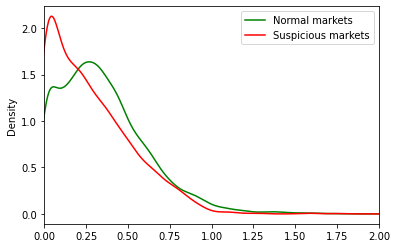

In [ ]:

fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~(auctions['stable'] & auctions['cartel']))   & (auctions['com_n'] != -1)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

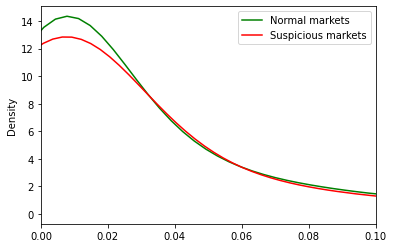

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.10000])
auctions[(~(auctions['stable'] & auctions['cartel']))  & (auctions['com_n'] != -1)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

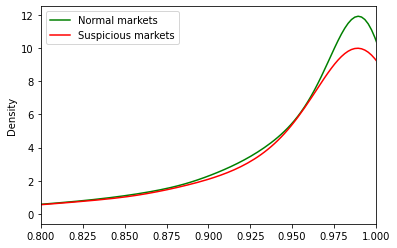

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[~(auctions['stable'] & auctions['cartel'])  & (auctions['com_n'] != -1) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

In [24]:
import numpy as np
from tqdm import tqdm 

coherence = []
for i in tqdm(range(19376)):
  firms = auctions[auctions['com_n'] == i]['participant_inn'].unique().tolist()
  com = G_nw.subgraph(firms).copy()
  w = []
  for e in com.edges():
    w.append(com.get_edge_data(*e)['weight'])
  w = np.array(w, dtype=np.float64)
  ch = np.clip(np.prod(w), 0, 1e6) ** (1/len(w)) / (np.mean(w) + 1e-6)
  if np.isnan(ch):
    print(w)
  coherence.append(ch)

100%|██████████| 19376/19376 [02:52<00:00, 112.19it/s]


In [ ]:
l = list(map(int, '1  2  1 22 19 22 12 20  1  4  2  8  2  4  4  4 20 20 18 11  1  1 19 19 12 12 12 22  1  2  1  2  1'.split()))
l = np.array(l, dtype=np.float64)
np.prod(l) 

1.5721317456784707e+23

In [25]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile5.txt", "r")
s = ''
for l in f.readlines():
  s += l

s 
similar = set(map(int, s.split()))

In [28]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile4.txt", "r")
s = ''
for l in f.readlines():
  s += l

s 

'[0.8019801319247318, 0.9062105238684478, 0.9174760079848843, 0.8876353251123559, 0.8836259816007257, 0.8514391640015482, 0.8369463179570977, 0.8905881978483672, 0.7612995154268338, 0.9154403773628075, 0.9150986659730731, 0.8950354120941207, 0.882230670182108, 0.8662836440322821, 0.8785095599474404, 0.9007552620097191, 0.912046753214593, 0.9071817713318118, 0.7998913829452918, 0.8974129706558057, 0.941904708246474, 0.9096474461442186, 0.9744899805327795, 0.9251477440618252, 0.9208801384049319, 0.8954822503786339, 0.8944297510649896, 0.7999433110069074, 0.9054465431872364, 0.8597002270178605, 0.9650408154977054, 0.9079324729500717, 0.8950918541443479, 0.9764137011502012, 0.9316656856974691, 0.9780607247796278, 0.9221843830342841, 0.9615757524660653, 0.9224345095053416, 0.896066063174114, 0.9608578010164905, 0.9158541376477731, 0.8874393281799738, 0.9255124797604863, 0.934803657880581, 0.8633127972675327, 0.8780091600297814, 0.9642274842624685, 0.9340479961018394, 0.9651051697729789, 0.9

In [ ]:
 np.percentile(coherence, 70)

0.9999990000010001

In [ ]:
ex_clip = np.percentile(exclusivity, 70)

In [31]:
exclusivity = np.array(exclusivity)
coherence = np.array(coherence)

In [ ]:
coherence[151:].mean()

0.44208916978760476

In [ ]:
coherence = np.array(coherence)

In [32]:
auctions['coherence'] = coherence[auctions['com_n']]
auctions['exclusivity'] = exclusivity[auctions['com_n']]

In [33]:
auctions['coherent'] = coherence[auctions['com_n']] >= np.mean(coherence[151:])
auctions[auctions['coherent']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,one_com,cv_price,cv_bidding,cv_date,month,stable,cartel,coherence,exclusivity,coherent
21,2030068,8.101000e+17,Severnaja_Osetija-Alanija_Resp,8.101000e+09,235232.91,NaN,2014-04-08 00:00:00,2014-04-17 18:00:00,NaN,4,...,True,1.073233,0.032387,0.296322,4,False,False,0.999999,1.0,True
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,True,0.000000,0.010997,0.014866,4,True,False,0.999999,1.0,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,True,0.000000,0.010997,0.014866,4,True,False,0.999999,1.0,True
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,True,0.000000,0.017586,1.105977,5,True,True,0.999999,1.0,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,True,0.000000,0.017586,1.105977,5,True,True,0.999999,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375258,3664255,3.423000e+17,Samarskaja_obl,3.423000e+09,222190.00,RUB,2021-12-30 11:36:02,2022-01-14 06:00:00,NaN,3,...,True,0.000000,0.006153,0.505076,12,False,False,0.999999,1.0,True
3375259,3664254,3.423000e+17,Samarskaja_obl,3.423000e+09,222190.00,RUB,2021-12-30 11:36:02,2022-01-14 06:00:00,NaN,3,...,True,1.653139,0.006153,0.505076,12,False,False,0.999999,1.0,True
3375318,3112643,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,True,0.526995,0.056318,0.321428,12,True,False,0.999999,1.0,True
3375319,3112642,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,True,0.000000,0.056318,0.321428,12,True,False,0.999999,1.0,True


In [ ]:
auctions['exclusive'] = exclusivity[auctions['com_n']] >= 1
auctions[auctions['exclusive']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,cv_date,year,month,stable,sev_times,cartel,coherence,exclusivity,coherent,exclusive
21,2030068,8.101000e+17,Severnaja_Osetija-Alanija_Resp,8.101000e+09,235232.91,NaN,2014-04-08 00:00:00,2014-04-17 18:00:00,NaN,4,...,0.296322,2014,4,False,True,False,0.999999,1.0,True,True
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,0.014866,2014,4,True,False,False,0.999999,1.0,True,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,0.014866,2014,4,True,False,False,0.999999,1.0,True,True
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,1.105977,2014,5,True,False,True,0.999999,1.0,True,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,1.105977,2014,5,True,False,True,0.999999,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375319,3112642,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,0.321428,2021,12,True,True,False,0.999999,1.0,True,True
3375392,3966470,2.081000e+17,Marij_El_Resp,2.081000e+09,64200.00,RUB,2021-12-30 14:40:34,2022-01-14 12:00:00,NaN,3,...,0.718975,2021,12,True,True,False,0.866025,1.0,False,True
3375393,3966469,2.081000e+17,Marij_El_Resp,2.081000e+09,64200.00,RUB,2021-12-30 14:40:34,2022-01-14 12:00:00,NaN,3,...,0.718975,2021,12,True,True,False,0.866025,1.0,False,True
3375482,4644438,1.131000e+17,Udmurtskaja_Resp,1.131000e+09,50000.00,RUB,2021-12-30 16:49:38,2022-01-14 10:00:00,NaN,5,...,0.449115,2021,12,False,True,False,0.567295,1.0,False,True


In [30]:
exclusivity = list(map(float,s.lstrip('[').rstrip(']').split(',')))

In [ ]:
auctions['cv_price'] = auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['price'].transform('std')

2          197975.954159
7          150824.912613
11         150824.912613
12         143104.909155
14         139393.959942
               ...      
3375722    124705.375895
3375723    187526.537459
3375724    187526.537459
3375726    111274.954168
3375727    124960.323979
Name: price, Length: 1235556, dtype: float64

In [ ]:
auctions[auctions['one_com'] & auctions['won'] & (auctions['com_n'] == 586)].groupby('com_n')['price'].transform('std') / auctions[auctions['one_com'] & auctions['won'] & (auctions['com_n'] == 586)].groupby('com_n')['price'].transform('mean')

2118136   NaN
Name: price, dtype: float64

In [ ]:
auctions[auctions['one_com'] & auctions['won'] & (auctions['com_n'] == 586)]['price'].std(ddof=0)

0.0

In [ ]:
auctions['one_com'] = auctions.groupby('auction_id')['com_n'].transform('nunique') == 1
auctions['cv_price'] = auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['price'].transform('std', ddof=0)


In [ ]:
auctions[auctions['coherent']  & auctions['exclusive'] & auctions['cartel'] & auctions['stable'] &(auctions['com_n'] >=151)][auctions[auctions['coherent']  & auctions['exclusive'] & auctions['cartel'] & auctions['stable'] &(auctions['com_n'] >=151)].groupby('com_n')['participant_inn'].transform('nunique') == 6]['com_n']

1788580    579
1788581    579
1788582    579
1788584    579
1788585    579
1788593    579
2118131    586
2118132    586
2118133    586
2118135    586
2118136    586
2118137    586
Name: com_n, dtype: int64

In [ ]:
auctions[auctions['stable']  & (auctions['com_n'] >=151)]['com_n'].nunique()

14767

In [ ]:
auctions[auctions['cartel']]['participant_inn'].nunique()

15657

In [ ]:
auctions[auctions['cartel']]['com_n'].nunique()

7008

In [ ]:
auctions[auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']].groupby('com_n')['participant_inn'].nunique()

com_n
147      17
236      10
428       7
579       6
586       6
         ..
19365     2
19366     2
19367     2
19372     2
19373     2
Name: participant_inn, Length: 5486, dtype: int64

In [ ]:
auctions[auctions['com_n'] == 90]['name']

5791                                                     NaN
5792                                                     NaN
7370                                                     NaN
7371                                                     NaN
19080                                                    NaN
                                 ...                        
3134373    Бензин автомобильный с октановым числом более ...
3215721    Бензин автомобильный с октановым числом более ...
3243357    Бензин автомобильный с октановым числом более ...
3277606    Бензин автомобильный с октановым числом более ...
3344952    Бензин автомобильный с октановым числом более ...
Name: name, Length: 1076, dtype: object

In [ ]:
auctions[auctions['cartel'] & auctions['stable'] & auctions['coherent'] & auctions['exclusive']]['com_n'].unique()[50:150]

KeyError: ignored

In [186]:
kpl = auctions[auctions['com_n'].isin([523, 4375])]
kpl[['auction_id', 'participant_inn']]

,auction_id,participant_inn
370118,1353452,-470403618839
370119,1353452,-780425014634
370165,1325503,-780405658567
370214,1367546,-781309229119
370215,1367546,-780212833981
370221,1325503,-780425014634
1040319,1329489,-470302348865
1040327,1329489,-781309229119
1040361,1329491,-780425014634
1040363,1329491,-780405658567


In [187]:
coms1 = kpl.groupby('com_n')['participant_inn'].unique().apply(list).tolist()
coms1

[[-470403618839,
  -780425014634,
  -780405658567,
  -781309229119,
  -780212833981,
  -470302348865],
 [-780202383469, -783830042394, -780243876209]]

In [ ]:
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/updated.csv")

In [ ]:
auctions[auctions['com_n'] == 1854][['code', 'region']]

,code,region
2786,15.071.0,Orenburgskaja_obl
2789,15.071.0,Orenburgskaja_obl
2790,15.071.0,Orenburgskaja_obl


In [ ]:
auctions[(auctions['code'] == '15.071.0') & (auctions['region'] == 'Orenburgskaja_obl')]['com_n'].unique()

array([1854,   17,    2, 5608,    4,   -1,   37,    8,   19,   18,    5])

In [188]:
G_k = nx.Graph()
G_k.add_nodes_from(kpl['participant_inn'], bipartite=0)
dct  = kpl.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_k.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_k[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_k.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_k)  

9

In [123]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 5.1 MB/s 
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9408 sha256=0b6ba556e19aa2257c3532481f981d55c46f31533fc4caccd665ec775584e7b2
  Stored in directory: /root/.cache/pip/wheels/f6/23/43/a714ed84811240ec3e8e709b8594ecdfbc8ad36ca5d949e38e
Successfully built python-louvain


In [131]:
import community.best_partition

ModuleNotFoundError: ignored

In [149]:
coms1

[[-164604449196,
  -165016918928,
  -1639044483,
  -1646025940,
  -1640003308,
  -1650169189,
  -165006323583,
  -166019145033,
  -1657134718],
 [-1650100406, -1650132863],
 [-165712041198, -1661009660]]

In [145]:
[i for i in range(len(coms)) for j in range(len(coms[i]))]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3]

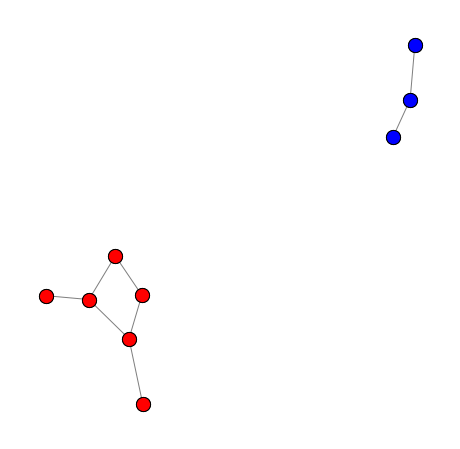

In [189]:
from cdlib import viz

# fig,ax = plt.subplots(1,1, figsize=(10,10))
size = 4

pos = nx.spring_layout(G_k)
count = 0
total_c = []
coms = algorithms.louvain(G_k)
coms.communities = coms1
viz.plot_network_clusters(G_k, coms, pos)

In [190]:
kpl.groupby('com_n')[['bid_price', 'cv_price', 'cv_bidding', 'coherence', 'exclusivity']].mean()

,bid_price,cv_price,cv_bidding,coherence,exclusivity
com_n,,,,,
523,0.995475,0.000352,0.003131,0.962110,1.0
4375,0.999465,0.000023,0.000272,0.942808,1.0


1.0

In [191]:
auctions[auctions['com_n'].isin([523, 4375]) ].groupby('com_n')[['bid_price', 'cv_price', 'cv_bidding', 'coherence', 'exclusivity']].mean()

,bid_price,cv_price,cv_bidding,coherence,exclusivity
com_n,,,,,
523,0.995475,0.000352,0.003131,0.962110,1.0
4375,0.999465,0.000023,0.000272,0.942808,1.0


In [145]:
auctions[auctions['code'] == '74.070.0']['name'].unique()

array(['Услуги по дезинфекции, дезинсекции и дератизации',
       'Услуги по мытью окон',
       'Услуги по дератизации (уничтожению грызунов)',
       'Услуги по чистке и уборке прочие',
       'Услуги по чистке и уборке общего назначения',
       'Услуги по чистке и уборке общего назначения прочие',
       'Услуги по борьбе с вредителями прочие (в том числе по санитарной обработке вещей)',
       'Услуги по уборке помещений, оборудованных компьютерами',
       'Услуги по дезинфекции помещений',
       'Услуги по чистке печей и дымоходов'], dtype=object)

In [193]:
stable[4375]

1.0

In [ ]:
coherence[1854], coherence[5608]

(0.9999990000010001, 0.9999990000010001)

In [ ]:
kpl2 = auctions[auctions['com_n'].isin([305,4211, 15415])]

In [ ]:
print(auctions[auctions['exclusive']]['participant_inn'].nunique())
print(auctions[auctions['coherent']]['participant_inn'].nunique())
print(auctions[auctions['exclusive'] & auctions['coherent'] & auctions['stable']]['participant_inn'].nunique())

45976
32470
27270


In [ ]:
print(auctions[auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']]['participant_inn'].nunique())


11452


In [ ]:
auctions[auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']]['com_n'].nunique()

5486

In [ ]:
auctions['participant_inn'].nunique()

480787

IndexError: ignored

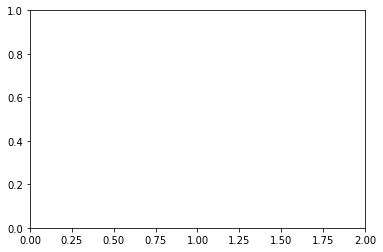

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~auctions['coherent'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['coherent']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

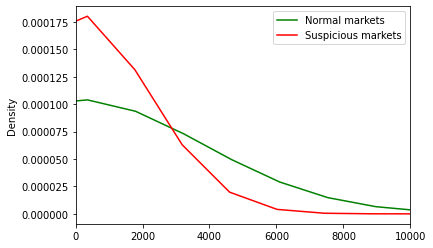

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1e4])
auctions[(~auctions['coherent'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['coherent']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

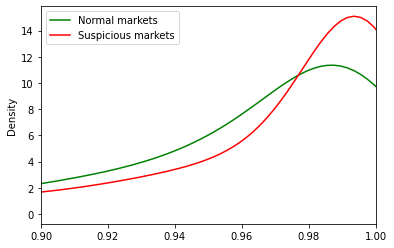

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['coherent'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['coherent']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

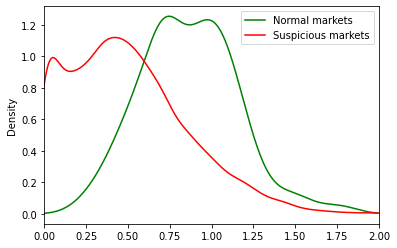

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~auctions['exclusive'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

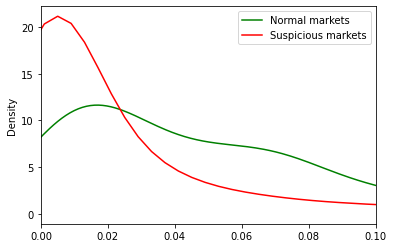

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~auctions['exclusive'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

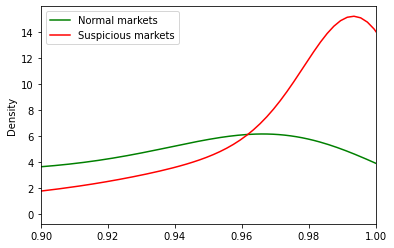

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['exclusive'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

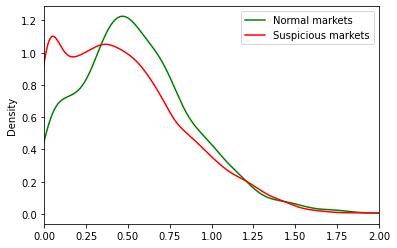

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~(auctions['exclusive'] & auctions['coherent']))  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

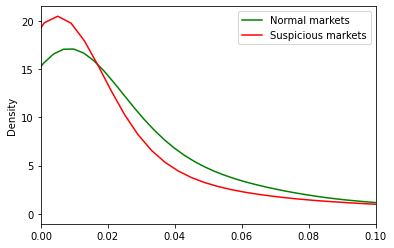

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~(auctions['exclusive'] & auctions['coherent']))  & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) & (auctions['com_n'] != -1)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

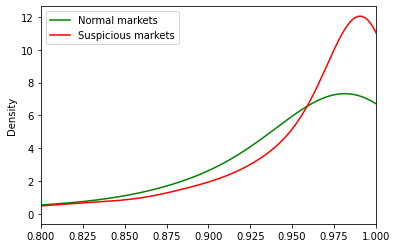

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(~(auctions['exclusive'] & auctions['coherent']) & auctions['cartel'])  & (auctions['com_n'] >= 151) & (auctions['won'])& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) & (auctions['com_n'] >= 151) & (auctions['won']) & auctions['cartel']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
coherence.mean()

0.9751700025349427

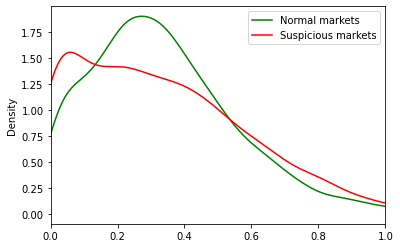

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])  & (auctions['com_n']>=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >=151) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

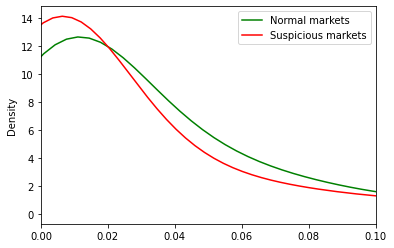

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 0.1])
auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density( color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
auctions['small_var']auctions['cv_date'].median()

0.8631476711433497

0.00568953655023185


0.011099948662815023

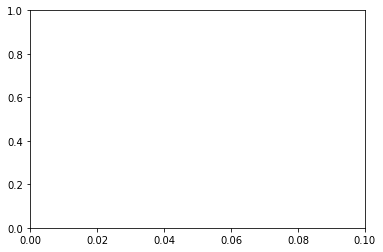

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions['low_date'] = auctions['cv_date'] < auctions['cv_date'].quantile(0.2)
print(auctions[auctions['low_date'] & (auctions['com_n'] >= 151)].groupby(['com_n'])['cv_bidding'].mean().median())
auctions[(~auctions['low_date']) & (auctions['com_n'] >= 151)].groupby(['com_n'])['cv_bidding'].mean().median()


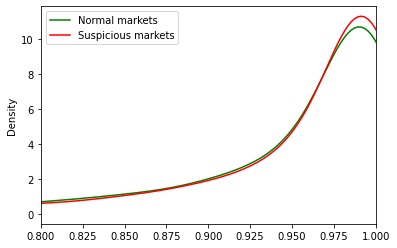

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(auctions['exclusive'] & auctions['coherent'] )& (~auctions['cartel'] )  & (auctions['com_n'] != -1) & auctions['won']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['won']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

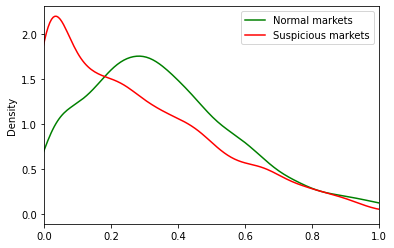

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

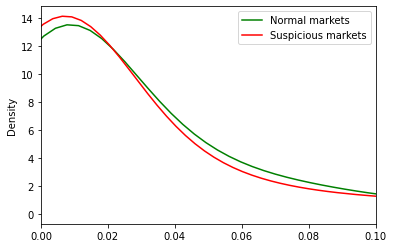

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

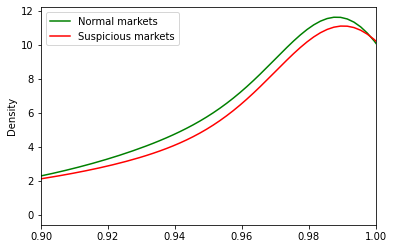

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) )  & (auctions['com_n'] >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

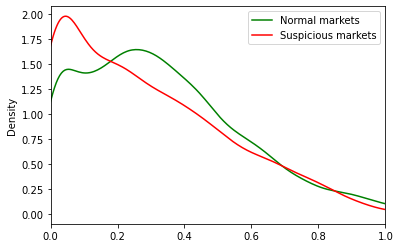

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable']) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

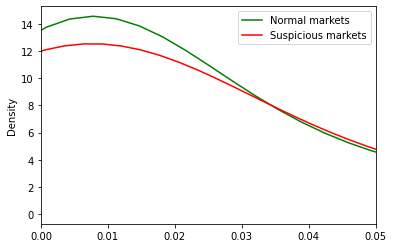

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.05])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']))& auctions['sev_times'] & (auctions['com_n'] >= 151) ].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent'])  & (auctions['stable']) & (auctions['cartel'])& auctions['sev_times'] & (auctions['com_n'] >= 151)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

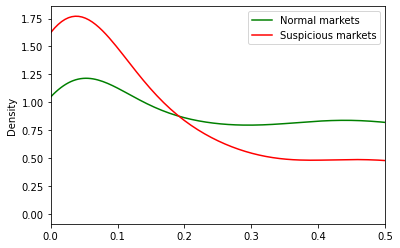

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.5])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  &  (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >=151) & (auctions['stable']) ].groupby(['com_n'])['cv_date'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

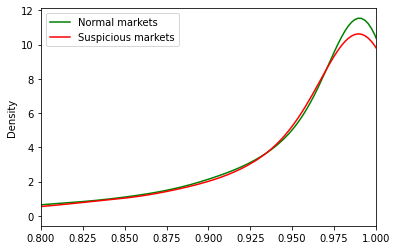

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel'] )& auctions['won'])  & (auctions['com_n'] >= 150)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 150) & (auctions['stable']) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

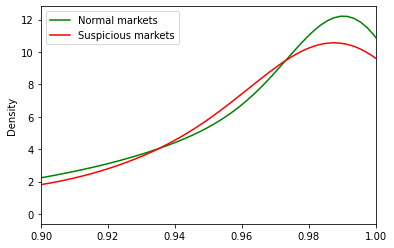

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~(auctions['fixed_labels']))  & (auctions['com_n'] >= 150) & auctions['sev_times']].groupby(['com_n'])['win_bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['fixed_labels']) & auctions['sev_times'] & (auctions['com_n'] >= 150)].groupby(['com_n'])['win_bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
from scipy.stats import mannwhitneyu
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
mannwhitneyu(auctions[(auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean())

0.9383662487314336 0.11245501551820687 0.9773569108198228
0.9459380126291413 0.09077949023258379 0.9748306635723853


MannwhitneyuResult(statistic=13369117.5, pvalue=0.01723771072616993)

In [ ]:
from scipy.stats import mannwhitneyu
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
mannwhitneyu(auctions[(auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean())

0.2696829622719108 0.23813471735659586 0.21990897563296752
0.413049725850689 0.268268795894072 0.3671049621294794


MannwhitneyuResult(statistic=9000579.5, pvalue=3.931607302040118e-202)

In [ ]:
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['stable'])  & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['stable']) & (auctions['won']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(~auctions['stable']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean())

0.038133432720263837 0.10600741627261262 0.007944650670093256
0.04286910882061732 0.11246425969873391 0.011884147582927237


MannwhitneyuResult(statistic=12847501.0, pvalue=2.0430589975100988e-08)

In [ ]:
print(auctions[(auctions['coherent']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['coherent']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(auctions[(~auctions['coherent'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['coherent'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['coherent'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['coherent'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['coherent']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['coherent']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[(~auctions['coherent'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['coherent'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['coherent'])].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['coherent'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['coherent']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['coherent']) ].groupby(['com_n'])['cv_bidding'].mean().std())
print(auctions[(~auctions['coherent'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['coherent'])].groupby(['com_n'])['cv_bidding'].mean().std())
auctions['coherent'] = coherence[auctions['com_n']] >= np.mean(coherence[151:])
auctions[auctions['coherent']]
mannwhitneyu(auctions[(auctions['coherent'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['coherent'])].groupby(['com_n'])['cv_bidding'].mean())

0.9340557273794416 0.12472801293826326
0.9325713057986451 0.10616389786569809
MannwhitneyuResult(statistic=25391170.5, pvalue=6.246004993541366e-38)
1.7986831903326428e-06 1.9006885700455046e-05
3.891555444040087e-06 1.9905389025296924e-05
MannwhitneyuResult(statistic=12703786.0, pvalue=0.0)
0.03828750747313475 0.10907605099252789
0.04431756744481224 0.09548597543090566


MannwhitneyuResult(statistic=24061090.5, pvalue=2.750710921290183e-66)

In [ ]:
print(auctions[(auctions['exclusive']) ].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive']) ].groupby(['com_n'])['bid_price'].mean().std())
print(auctions[(~auctions['exclusive'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'])].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['exclusive'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[(~auctions['exclusive'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'])].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['exclusive'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive']) ].groupby(['com_n'])['cv_bidding'].mean().std())
print(auctions[(~auctions['exclusive'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'])].groupby(['com_n'])['cv_bidding'].mean().std())
mannwhitneyu(auctions[(auctions['exclusive'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['exclusive'])].groupby(['com_n'])['cv_bidding'].mean())

0.9492641785085573 0.10347019477472143
0.904961628672427 0.0795297963727519
MannwhitneyuResult(statistic=1259063.0, pvalue=2.2051882055368575e-45)
0.49850471188498763 0.35951402061652804
0.8697927981122303 0.3024184294379434
MannwhitneyuResult(statistic=2191979.0, pvalue=8.417743652796093e-05)
596.857467526751 15804.869222712756
552.943060189841 4179.8043670046445


MannwhitneyuResult(statistic=2288809.0, pvalue=0.003556144425144495)

In [ ]:
print(auctions[(auctions['cartel']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['cartel']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~auctions['cartel'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['coherence'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['coherence'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['exclusivity'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().median())
mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean())




0.9472861331078093 0.10136992239706967 0.9818925751548158
0.9393629395902696 0.10399209887921149 0.975
MannwhitneyuResult(statistic=10584277.5, pvalue=6.483965648334562e-17)
0.3277520923802639 0.26797205193925294 0.281188661524475
0.20399689814453847 0.25946910897604025 0.2989984141101332
MannwhitneyuResult(statistic=11819767.0, pvalue=0.0)
0.03548723714894852 0.0953650928925172 0.007188371953452161
0.04241275148857817 0.11483447017373809 0.011103112756020779
MannwhitneyuResult(statistic=10504983.5, pvalue=5.0874607760637355e-19)
0.98460383551617 0.04728184743717938 0.9999990000010001
0.9533727485139485 0.09236626334901 0.9999990000010001
MannwhitneyuResult(statistic=9627668.5, pvalue=1.0907785472246402e-53)
0.98460383551617 0.04728184743717938 0.9999990000010001
0.9533727485139485 0.09236626334901 0.9999990000010001
MannwhitneyuResult(statistic=9627668.5, pvalue=1.0907785472246402e-53)
0.9999841255409944 0.0005238757032151278 1.0
0.9995483752670612 0.004438047299308177 1.0


MannwhitneyuResult(statistic=11588941.5, pvalue=3.713494597202278e-12)

In [ ]:
print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean()))

0.5135061212790457 0.4790233224171222 0.391276723899041
0.5232597221381898 0.4391378310031327 0.44852183691306413
MannwhitneyuResult(statistic=11317915.5, pvalue=0.0007815742204398982)


In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'])& (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'])& (auctions['won'])&(auctions['com_n'] >=151)].groupby(['com_n'])['bid_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent']) & (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'])& (auctions['won'])&(auctions['com_n'] >=151)].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent']) ].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent']) & (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent']) &(auctions['com_n'] >=151)].groupby(['com_n'])['cv_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent']) & (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'])].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'])&(auctions['com_n'] >=151)].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent']) ].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent']) & (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'])&(auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'])&(auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent']) & (auctions['won']) &(auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'])&(auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean())

0.9339669425474353 0.12474576943822932 0.980138131111465
0.9357838032867923 0.10584978619805008 0.9680910337018727
MannwhitneyuResult(statistic=24871808.0, pvalue=8.730400060429e-26)
0.48088378876698773 0.3677036114757403 0.42958156217067517
0.5408783906600855 0.34111111086526974 0.5065197297799957
MannwhitneyuResult(statistic=13908833.0, pvalue=0.0)
371.48571335190036 12688.19488141751 0.4466498378352542
1026.7423399077525 20351.47347373474 0.5276448680686273


MannwhitneyuResult(statistic=14043717.5, pvalue=0.0)

In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std()), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().std())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().std())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean())

0.9305713574176674 0.13018404289733185
0.9403623256316911 0.10039685995878948
MannwhitneyuResult(statistic=38776000.5, pvalue=3.548671589214229e-12)
0.43684393902920443 0.3715056431928755
0.556339120680807 0.3485540487853924
MannwhitneyuResult(statistic=16751652.5, pvalue=0.0)
185.22977595838145 10781.873526371532
877.2049995281823 18205.50161971677


MannwhitneyuResult(statistic=16849696.0, pvalue=0.0)

In [ ]:
print(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean()))

0.5245896543797637 0.5015868789502511 0.3738547661579359
0.4622393276519645 0.4335534554530619 0.42433429894070396
MannwhitneyuResult(statistic=740101.0, pvalue=0.3065220375427514)


In [ ]:
print(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151) ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean()))

0.5186909868341943 0.5057830188821567 0.3478537677013489
0.5179541798576989 0.417459821514699 0.4667993975885293
MannwhitneyuResult(statistic=10101857.5, pvalue=1.8882407815571257e-07)


In [ ]:
auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean()

com_n
0        1.612616e+02
1        7.380537e+01
2        5.982415e+02
3        1.016972e+02
4        1.262930e+02
             ...     
19262    1.346404e-05
19265    3.921306e-07
19308    5.277979e-06
19341    8.986331e-06
19371    6.179577e-06
Name: cv_bidding, Length: 6251, dtype: float64

In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']&(auctions['com_n'] >=151)& auctions['sev_times']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel']&(auctions['com_n'] >=151)& auctions['sev_times']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean())

0.9493569929430921 0.09305335579374031 0.9820315455006534
0.9349921848174357 0.10020996544772284 0.9741099075992615
MannwhitneyuResult(statistic=3296631.0, pvalue=5.846606180386691e-35)
0.34231582194023985 0.2768479887642775 0.42695091463905704
0.34167460359215557 0.23596095168549266 0.46820735999211455
MannwhitneyuResult(statistic=3929799.0, pvalue=0.018305233716752856)
0.03563009631117769 0.09631532911297709 0.007035888369980392
0.043875307621782794 0.09989412457970845 0.01104217924549557


MannwhitneyuResult(statistic=3204393.5, pvalue=1.8651930110030064e-43)

In [ ]:
auctions[auctions['stable'] & auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] &(auctions['com_n'] >=151)& auctions['sev_times']]['participant_inn'].nunique()

3562

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel'] )& auctions['won'])  & (auctions['com_n'] >= 150)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 150) & (auctions['stable']) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']))& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean())

0.9450484276679181 0.1226435486004759 0.9817989672035318
0.9411649098507112 0.12083455420023574 0.9750461074163079
MannwhitneyuResult(statistic=11087093.5, pvalue=4.4368663015299557e-07)
0.2882858984307296 0.1935120233169736 0.23570226039551584
0.3438135321094392 0.267971143218426 0.3030457633656632
MannwhitneyuResult(statistic=9022767.5, pvalue=9.056976593371604e-65)
0.036238351130322415 0.09995467223995859 0.00711232386866765
0.0410736863683659 0.1103365702683324 0.010473420360680288


MannwhitneyuResult(statistic=11034138.0, pvalue=8.987669860359026e-08)

In [ ]:
print(auctions[(auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
mannwhitneyu(auctions[( auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean())

0.9348175506976382 0.1248949961191898
0.9333208936420869 0.11981048362401289
MannwhitneyuResult(statistic=36653315.5, pvalue=3.213342134968351e-14)
0.4332083910255086 0.3640125381490061
0.525128406989492 0.3603623871806035
MannwhitneyuResult(statistic=29911198.0, pvalue=4.9164851043423364e-154)
188.97340484301665 0.3640125381490061
690.6835036871837 0.3603623871806035


MannwhitneyuResult(statistic=29720381.0, pvalue=3.0101350613874674e-160)

In [ ]:
pip install cleanlab

     |████████████████████████████████| 95 kB 3.1 MB/s 


In [ ]:
pip install catboost

     |████████████████████████████████| 76.6 MB 92 kB/s 


In [ ]:
auctions.columns

Index(['Unnamed: 0', 'purchase_number', 'region', 'procurer_reg_num',
       'max_price', 'currency', 'start_date', 'end_date', 'prolong_date',
       'n_commission_members', 'participant_inn', 'price', 'date',
       'is_approved', 'is_after_prolong', 'auction_id', 'Unnamed: 0.1',
       'code_1', 'code_2', 'code_3', 'code_4', 'name', 'object',
       'Unnamed: 0_y', 'auction_id_y', 'start_date_y', 'code_1_y', 'code_2_y',
       'code_3_y', 'code_4_y', 'if_okpd2', 'name_y', 'single', 'bid_date',
       'bid_price', 'con.met', 'won', 'con.win', 'sel_num', 'sel.period',
       'au.reserve', 'au.duration', 'auciton_id', 'com_n', 'sus', 'com',
       'year', 'one_com', 'cv_price', 'cv_bidding', 'cv_date', 'month',
       'stable', 'sev_times', 'cartel', 'coherence', 'exclusivity', 'coherent',
       'exclusive'],
      dtype='object')

In [ ]:
auctions['stability'] = stable[auctions['com_n']]

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# from cleanlab.classification import CleanLearning
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
auctions['win_bid_price'] = auctions[auctions['won'] ].groupby('com_n')['bid_price'].transform('mean')
X = auctions[['win_bid_price', 'cv_price', 'cv_bidding', 'com_n']].groupby('com_n').mean()
X.shape
X.head()
auctions['num'] = auctions.groupby('com_n')['participant_inn'].transform('nunique')
X = auctions[auctions['sev_times']&(auctions['com_n'] >=151)][['bid_date', 'win_bid_price', 'cv_price', 'cv_bidding', 'cv_date', 'coherence', 'exclusivity', 'com_n', 'num']].groupby('com_n').mean()
X.shape
X.head()
auctions['susp'] = auctions['cartel'] & auctions['stable'] & auctions['exclusive'] & auctions['coherent']
y = auctions[auctions['sev_times']&(auctions['com_n'] >=151)].groupby('com_n')['susp'].mean().astype(int)
#y = np.array(y)
clf = CatBoostClassifier() # any classifier implementing the sklearn API

num_crossval_folds = 3  # for efficiency; values like 5 or 10 will generally work better
pred_probs = cross_val_predict(
    clf,
    X,
    y,
    cv=num_crossval_folds,
    method="predict_proba",
)

Learning rate set to 0.023659
0:	learn: 0.6745491	total: 8.79ms	remaining: 8.79s
1:	learn: 0.6562157	total: 13.2ms	remaining: 6.58s
2:	learn: 0.6441211	total: 21.9ms	remaining: 7.27s
3:	learn: 0.6304416	total: 33.7ms	remaining: 8.39s
4:	learn: 0.6153588	total: 36.8ms	remaining: 7.32s
5:	learn: 0.6049997	total: 43.7ms	remaining: 7.24s
6:	learn: 0.5929515	total: 51.7ms	remaining: 7.33s
7:	learn: 0.5802571	total: 57.7ms	remaining: 7.15s
8:	learn: 0.5722425	total: 64.1ms	remaining: 7.06s
9:	learn: 0.5623301	total: 72.3ms	remaining: 7.16s
10:	learn: 0.5551944	total: 80.4ms	remaining: 7.23s
11:	learn: 0.5485116	total: 88.6ms	remaining: 7.29s
12:	learn: 0.5402957	total: 100ms	remaining: 7.61s
13:	learn: 0.5323481	total: 105ms	remaining: 7.42s
14:	learn: 0.5248658	total: 124ms	remaining: 8.15s
15:	learn: 0.5179492	total: 129ms	remaining: 7.94s
16:	learn: 0.5109935	total: 137ms	remaining: 7.93s
17:	learn: 0.5050066	total: 140ms	remaining: 7.64s
18:	learn: 0.4996830	total: 143ms	remaining: 7.38s

In [ ]:
from cleanlab.filter import find_label_issues

ranked_label_issues = find_label_issues(
    labels=y, pred_probs=pred_probs, return_indices_ranked_by="self_confidence"
)

print(f"Cleanlab found {len(ranked_label_issues)} potential label errors.")

Cleanlab found 1371 potential label errors.


In [ ]:
auctions[auctions['com_n'].isin(ranked_label_issues)].groupby('com_n')['cartel'].prod().sum()

534

In [ ]:
y.head()

com_n
151    0
152    0
153    0
154    0
155    1
Name: cartel, dtype: int64

In [ ]:
auctions['fixed_labels'] = auctions['com_n'].isin(ranked_label_issues)
auctions.loc[auctions['com_n'].isin(ranked_label_issues), ['fixed_labels']] = ~auctions['cartel']
auctions[auctions['fixed_labels']]['com_n'].nunique()

837

In [ ]:
auctions[(~auctions['fixed_labels']) & (auctions['cartel'])]['com_n'].min()

90

In [ ]:
auctions[auctions['cartel']]['com_n']

51          4827
52          4827
316         8436
396        11142
460         9662
           ...  
3374811     4825
3374812     4825
3374813     4825
3375191    16783
3375598    12498
Name: com_n, Length: 29813, dtype: int64

In [ ]:
X.iloc[ranked_label_issues].assign(label=y.iloc[ranked_label_issues]).head()

,bid_date,bid_price,cv_price,cv_bidding,cv_date,stability,coherence,exclusivity,label
com_n,,,,,,,,,
4736,353643.25,0.977075,0.264140,0.014680,0.968246,1.0,0.957248,1.0,1
4500,204510.00,0.970701,0.264772,0.010236,0.780775,1.0,0.957248,1.0,1
2270,136150.00,0.974243,0.256421,0.023433,0.883693,1.0,0.913195,1.0,1
2124,55545.00,0.945337,0.277102,0.003019,0.712914,1.0,0.957248,1.0,1
1857,243225.00,0.977483,0.348040,0.022330,0.653439,1.0,0.957248,1.0,1


In [ ]:
X[X['label']==1]

KeyError: ignored

In [ ]:
def stability_auctions(com_n):
  comsx = auctions[(auctions['com_n'] == com_n) & auctions['one_com']]
  aas = comsx['auction_id'].unique().tolist()
  firms_l = []
  for k in range(len(aas)):
    firms = comsx[comsx['auction_id'] == aas[k]]['participant_inn'].unique().tolist()
    firms_l.append(set(firms))

  ns_w = []
  if len(firms_l) <= 1:
    return [1]
  
  #print(len(firms_l))
  for i in range(len(firms_l)-1):
    ws1 = []
    com1 = G_n.subgraph(firms_l[i] | firms_l[i+1]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i] and e[1] in firms_l[i]:
        ws1.append(com1.get_edge_data(*e)['weight'])
      else:
        ws1.append(0)
    ws1 = np.array(ws1)
  #  print(ws1)
    ws2 = []
    # com2 = G_n.subgraph(communs[k+1][found[c]]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i+1] and e[1] in firms_l[i+1]:
        ws2.append(com1.get_edge_data(*e)['weight'])
      else:
        ws2.append(0)
    ws2 = np.array(ws2)
    ws1_dm = ws1 - np.mean(ws1)
    ws2_dm = ws2 - np.mean(ws2)
    # print(ws1_dm.sum(), ws2_dm.sum())
    wes = (ws1_dm * ws2_dm).sum() / ((((ws1_dm ** 2) * (ws2_dm ** 2)) ** 0.5).sum() + 1e-6)
    ns_w.append(wes)
  
  # nes_w_y.append(ns_w)
  return ns_w

In [ ]:
auctions.to_csv("/content/drive/MyDrive/Maria Mitrankova/counted.csv")

In [ ]:
from tqdm import tqdm

centralities = []
for i in tqdm(range(19376)):
  firms = auctions[(auctions['com_n'] == i)]['participant_inn'].unique().tolist()
  G = G_nw.subgraph(firms)
  c = nx.degree_centrality(G)
  centralities.append(c)

100%|██████████| 19376/19376 [02:15<00:00, 143.18it/s]


In [ ]:
centralities_cl = []
for i in tqdm(range(19376)):
  firms = auctions[(auctions['com_n'] == i)]['participant_inn'].unique().tolist()
  G = G_nw.subgraph(firms)
  c = nx.eigenvector_centrality(G, max_iter=1000)
  centralities_cl.append(c)

 95%|█████████▌| 18444/19376 [06:39<00:05, 158.31it/s]

In [ ]:
import numpy as np

centrals = []
for m in centralities:
  central = []
  for key in m:
    central.append(m[key])
  central = np.array(central)
  centrals.append(central)

centrals = np.array(centrals)

means = []
for c in centrals:
  means.append(c.mean())

In [ ]:
import numpy as np

centrals_ev = []
for m in centralities_cl:
  central = []
  for key in m:
    central.append(m[key])
  central = np.array(central)
  centrals_ev.append(central)

centrals_ev = np.array(centrals_ev)

means_ev = []
for c in centrals_ev:
  means_ev.append(c.mean())

In [ ]:
len(centralities_cl)

19376

In [ ]:
centralities = np.array(centralities)

In [ ]:
centralities_ev = np.array(centralities_ev)

NameError: ignored

In [ ]:
auctions['win_rate'] = auctions.groupby('participant_inn')['won'].transform('mean')
auctions['win_rate']

0          1.000000
1          0.476684
2          0.617021
3          0.476190
4          0.330739
             ...   
3375723    0.556701
3375724    0.523077
3375725    0.269916
3375726    0.319728
3375727    0.732984
Name: win_rate, Length: 3375728, dtype: float64

In [ ]:
global_d = {}
for c in centralities:
  global_d.update(c)

In [ ]:
global_d2 = {}
for c in centralities_cl:
  global_d2.update(c)

In [ ]:
auctions['ev_centrality'] = auctions['participant_inn'].apply(lambda x: global_d2.get(x))
auctions

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,cv_bidding,month,stable,coherent,exclusive,win_rate,d_centrality,central,is_central,ev_centrality
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.30,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,5198.115440,1,True,True,True,1.000000,NaN,NaN,False,NaN
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,169.260258,2,False,False,False,0.476684,0.005502,0.068712,False,0.006333
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,169.260258,2,False,False,False,0.617021,0.002113,0.068712,False,0.005186
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,169.260258,2,False,False,False,0.476190,0.001937,0.068712,False,0.002425
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,169.260258,2,False,False,False,0.330739,0.015098,0.068712,False,0.034854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375723,4273650,3.283000e+17,Vladimirskaja_obl,3.283000e+09,1288259.67,RUB,2021-12-31 12:32:29,2022-01-14 13:00:00,NaN,4,...,133.498439,12,False,False,False,0.556701,0.009342,0.053004,False,0.036220
3375724,4711880,3.303000e+17,Vologodskaja_obl,3.303000e+09,258615.57,RUB,2021-12-31 13:20:28,2022-01-17 09:00:00,NaN,3,...,133.498439,12,False,False,False,0.523077,0.007526,0.053004,False,0.032975
3375725,3202809,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,258.519389,12,False,False,False,0.269916,0.385321,0.700306,False,0.194739
3375726,3202808,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,258.519389,12,False,False,False,0.319728,0.134557,0.700306,False,0.112057


In [ ]:
auctions['d_centrality'] = auctions['participant_inn'].apply(lambda x: global_d.get(x))
auctions

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,year,one_com,cv_price,cv_bidding,month,stable,coherent,exclusive,win_rate,d_centrality
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.30,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,2014,True,6.925598,5198.115440,1,True,True,True,1.000000,NaN
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,2014,True,NaN,169.260258,2,False,False,False,0.476684,0.005502
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,2014,True,1.463424,169.260258,2,False,False,False,0.617021,0.002113
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,2014,True,NaN,169.260258,2,False,False,False,0.476190,0.001937
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.00,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,2014,True,NaN,169.260258,2,False,False,False,0.330739,0.015098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375723,4273650,3.283000e+17,Vladimirskaja_obl,3.283000e+09,1288259.67,RUB,2021-12-31 12:32:29,2022-01-14 13:00:00,NaN,4,...,2021,True,1.225696,133.498439,12,False,False,False,0.556701,0.009342
3375724,4711880,3.303000e+17,Vologodskaja_obl,3.303000e+09,258615.57,RUB,2021-12-31 13:20:28,2022-01-17 09:00:00,NaN,3,...,2021,True,1.225696,133.498439,12,False,False,False,0.523077,0.007526
3375725,3202809,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,2021,True,NaN,258.519389,12,False,False,False,0.269916,0.385321
3375726,3202808,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,2021,True,1.085352,258.519389,12,False,False,False,0.319728,0.134557


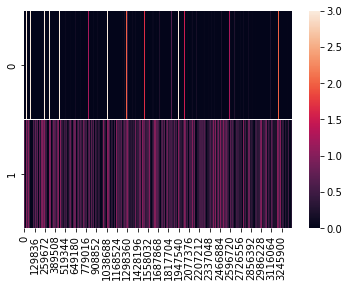

In [ ]:
import seaborn as sns

sns.heatmap([auctions['d_centrality'], auctions['win_rate']])

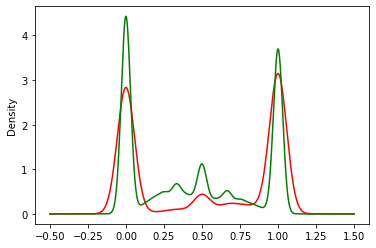

In [ ]:
auctions['central'] = auctions.groupby('com_n')['ev_centrality'].transform('max')
auctions['is_central'] = auctions['ev_centrality'] == auctions['central']
auctions[auctions['is_central']].groupby('participant_inn')['win_rate'].mean().plot.density(color='red')
auctions[~auctions['is_central']].groupby('participant_inn')['win_rate'].mean().plot.density(color='green')

In [ ]:
print(auctions[auctions['is_central']].groupby('participant_inn')['win_rate'].mean().mean())
auctions[~auctions['is_central']].groupby('participant_inn')['win_rate'].mean().mean()

0.533322715268119


0.4611217575080166